In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

plt.style.use('seaborn')
from matplotlib import rc, font_manager
style.use("fivethirtyeight")
style.use("seaborn-talk")
plt.rcParams['font.family'] = 'serif'

import pickle

import re

from ast import literal_eval

import warnings
warnings.filterwarnings('ignore')

import matplotlib
# matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

/tmp/ipykernel_11000/3569155428.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')
/tmp/ipykernel_11000/3569155428.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use("seaborn-talk")


In [ ]:
import pandas as pd

train_data = pd.read_csv("../data/train.csv")
num2target = ['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치']
num2target_dict = {idx:item for idx, item in enumerate(num2target)}
target2num = {item:idx for idx, item in enumerate(num2target)}

In [ ]:
train_data['target2num'] = train_data['target'].apply(lambda x:num2target[x])
train_data.head(5)

In [ ]:
matplotlib.matplotlib_fname()


In [ ]:
f, axes = plt.subplots(1, 1, figsize=(3,3))
sns.countplot(y='target', data=train_data, ax=axes)

In [ ]:
## 빅카인즈 합치기

# total_2018
import os
from tqdm import tqdm

# print(os.listdir("../data/bigkinds_2018/"))
imp_columns = ['제목', '통합 분류1', '본문', '언론사', '키워드', '일자', 'URL']
total_2018 = pd.DataFrame(columns=imp_columns)

for data in tqdm(sorted(os.listdir("../data/bigkinds_2018/")), desc="2018data"):
    print(f"working on... : {data}")
    monthly_data = pd.read_excel("../data/bigkinds_2018/"+data)

    # 내가 가져올 것은 제목, 통합분류 1, 본문, 일자
    imp_data = monthly_data[imp_columns]
    
    total_2018 = pd.concat([total_2018, imp_data])

print(f"total len: {len(total_2018)}")
total_2018.to_csv("../data/bigkinds_2018/total_2018.csv", index=False)
    
    
    
    

In [ ]:
total_2018 = pd.read_csv("../data/bigkinds_2018/total_2018.csv")
total_2018.head(5)

In [ ]:
target2num

In [ ]:
num2target_dict

In [ ]:
total_2018['통합 분류1'] = total_2018['통합 분류1'].replace({'지역':'생활문화'}, regex=True)
# total_2018[total_2018['통합 분류1'].str.contains("지역")]
total_2018['통합 분류1'].unique()

In [ ]:
# total_2018['통합 분류1'].replace({'지역':'생활문화'}, regex=True)
total_2018['target2num'] = total_2018['통합 분류1'].replace(num2target_dict, regex=True).replace(">.*", "", regex=True)
# total_2018['target'].apply(lambda x: num2target_dict[x])
total_2018['target2num'] = total_2018['target2num'].replace({'문화': '생활문화', '지역': '생활문화', 'IT_과학':'IT과학', '국제':'세계'}, regex=True)
total_2018['target'] = total_2018['target2num'].replace(target2num, regex=True)

total_2018['target'].unique()

In [ ]:
total_2018['제목'] = total_2018['제목'].apply(lambda x:re.sub('\[.*?\]',"",x))
total_2018 = total_2018.rename(columns={'제목':'text', '본문': 'body', '언론사':'stations', '키워드':'keyword', '일자':'date', '통합 분류1': 'pre_defined', 'URL':'url'})
print(total_2018.columns)


In [ ]:
id_list = ["2018_동아조선한겨레_"+str(i) for i in range(1, len(total_2018)+1)]
total_2018['ID'] = id_list


In [ ]:
total_2018.head(5)

In [ ]:
total_2018 = total_2018[['ID', 'text', 'target', 'url', 'date', 'target2num', 'body', 'keyword', 'pre_defined']]


In [ ]:
train_data_org = pd.read_csv("../data/train_spelling_v2.csv")
train_data_org['target2num'] = train_data_org['target'].apply(lambda x:num2target_dict[x])
total_2018['target'] = total_2018['target'].apply(lambda x:int(x))
train_2018_concat = pd.concat([train_data_org, total_2018], ignore_index=True)

In [ ]:
train_2018_concat.to_csv("../data/train_2018_concat_v1.csv", index=False)

In [ ]:
train_2018_concat['text'][0]

In [ ]:
train_2018_concat.head(5)

In [ ]:
type(train_2018_concat['text'][0])

In [ ]:
train_2018_concat['text']

In [ ]:
for i in range(len(train_2018_concat)):
    if type(train_2018_concat['text'][i]) != type(train_2018_concat['text'][0]):
        print(i)

In [ ]:
print(len(train_2018_concat), len(train_data_org))

In [ ]:
train_data_org = pd.read_csv("../data/train.csv")
col = train_data_org.columns
print(col, '\n', total_2018.columns)

In [ ]:
total

In [ ]:
total_2018['target'] = total_2018['통합분류']

In [ ]:
import pandas as pd
import re

# Example DataFrame
df = pd.DataFrame({"label": ["사회>사건_사고", "문화>생활", "경제>금융"]})

# Define the regular expressions and replacement values
regex_mapping = {"사회": "0", "문화": "1", "경제": "2"}  # Add more regular expressions and their corresponding replacement values

# Apply the regular expressions using the replace() function
df["new_label"] = df["label"].replace(regex_mapping, regex=True).replace(">.*", "", regex=True)

print(df)


In [ ]:
final20_df['text']=final20_df['text'].apply(lambda x: re.sub('[,‘’“”()/\"\'<>\[\]]','',x))

## 2. 명사 추출, 카운트, 빅데이터 분석 -> 라벨 후보

In [57]:
import pandas as pd
from konlpy.tag import Okt
import re

# test_body = "2019년 6월 22일 파키스탄을 방문해 임란 칸 총리(오른쪽)와 환담하는 카타르 군주(에미르) 셰이크 타밈 빈하마드 알타니[신화=연합뉴스](뉴델리=연합뉴스) 김영현 특파원 = 경제난 극복을 위해 우방과 국제기구에 잇따라 손을 벌려온 파키스탄이 이번에는 카타르에서 30억 달러(약 3조4천600억원) 규모의 투자를 유치했다.    25일 익스프레스 트리뷴 등 현지 매체에 따르면 카타르 정부는 전날 파키스탄에 자금 예치와 직접 투자 등을 통해 총 30억 달러를 신규 투자하겠다고 발표했다.    카타르 외교부는 '이번 투자를 통해 카타르와 파키스탄 정부 간 경제 협력 규모는 90억 달러(약 10조3천900억원)로 늘어나게 됐다'고 밝혔다.    이 같은 카타르의 투자 계획은 지난 22∼23일 카타르 군주(에미르)인 셰이크 타밈 빈하마드 알타니의 파키스탄 방문 직후 공개됐다.    앞서 파키스탄은 국제통화기금(IMF)과 세계은행(WB)으로부터 각각 60억 달러와 9억1천800만 달러의 차관을 들여오기로 한 바 있다.    파키스탄은 중국이 주도하는 일대일로(一帶一路:육상·해상 실크로드) 사업 등과 관련해 620억 달러 규모의 인프라 사업을 진행하면서 대규모 차관을 들여왔다가 빚더미에 오른 상태다.    이에 파키스탄은 중국에서 25억 달러의 긴급 자금을 받기로 한 것은 물론 사우디아라비아와 UAE에서도 각각 60억 달러와 62억 달러 규모의 차관이나 원유를 지원받기로 했다.    익스프레스 트리뷴은 '이번 카타르 투자금까지 포함하면 파키스탄이 지난 1년간 중국 등 4개국에서 빌린 자금의 규모는 160억 달러에 이른다'고 전했다.    cool@yna.co.kr▶네이버 홈에서 [연합뉴스] 채널 구독하기▶뭐 하고 놀까? #흥  ▶쇼미더뉴스! 오늘 많이 본 뉴스영상"
# test_body = "'조종석 녹음 자료 유출된 적 없다…사실 아닌 의견' 주장2019년 3월 21일 인도네시아 교통안전위원회(KNKT·영문 약자 NTSC)의 수르잔토 차효노 위원장(오른쪽)이 자카르타에서 기자회견을 하고 있다. [AP=연합뉴스](자카르타=연합뉴스) 황철환 특파원 = 189명을 태운 채 작년 10월 인도네시아 해상에 추락한 보잉 737 맥스(MAX) 8 여객기의 조종사들이 나눈 대화 내용을 전한 외신 보도에 대해 현지 항공당국이 '사실과 같지 않다'며 반박하고 나섰다.    21일 CNN 인도네시아 등 현지 언론에 따르면 인도네시아 교통안전위원회(KNKT·영문 약자 NTSC)의 수르잔토 차효노 위원장은 21일 기자회견을 하고 '언론에 보도된 내용과 실제 녹음 내용은 같지 않다'고 말했다.    그는 '보도된 사항은 개인 혹은 여럿의 견해가 조종석음성녹음장치(CVR)의 내용인 양 꾸며진 것'이라면서 올해 초 사고해역에서 인양한 CVR의 데이터는 절대로 유출된 적이 없다고 강조했다.    그는 해당 자료는 보잉이나 미국 연방항공청(FAA)에도 공유되지 않았다면서 '그들은 CVR을 읽고 해석하긴 했지만, 문자화한 자료나 음성 자체를 갖고 있진 않다'고 덧붙였다.    수르잔토 위원장은 녹음된 대화 내용을 그대로 공개하는 것은 인도네시아 법에 저촉되는 만큼 조사가 끝난 뒤 중요한 대목만 골라 선별적으로 내용을 밝히게 될 것이라고 말했다.    앞서, 로이터 통신은 복수의 소식통을 인용해 사고기의 조종사 두 명이 이륙 후 추락하기까지 13분간 나눈 대화 내용을 재구성해 전달했다.    이 매체는 사고기 조종사들이 작년 10월 29일 오전 자카르타 인근 수카르노 하타 국제공항에서 출발한 직후부터 조종상 문제를 겪었으며, 비상시 세부지침이 수록된 긴급참고교범(QRH)을 보고 대응방안을 찾으려 했지만 결국 실패했다고 보도했다.2018년 11월 3일 인도네시아 자카르타 탄중 프리옥 항에서 인근에 추락한 현지 저가항공사 라이온에어 소속 보잉 737 맥스 8 여객기의 잔해가 옮겨지고 있다. [AP=연합뉴스자료사진]이 여객기의 기내 컴퓨터는 센서 고장으로 기수가 너무 높이 들린 것으로 측정되자 실속(失速)을 막기 위해 자동으로 기수를 내려댔던 것으로 알려졌다.    이 경우 기내 컴퓨터와 연동된 항공기 자세제어 장치를 수동으로 전환해야 한다.     하지만, 소식통은 '이들(조종사들)은 자세제어 장치가 작동하고 있다는 사실을 몰랐던 것 같다. 조종석에선 비행속도와 고도에 대한 이야기만 오갔다'고 말했다.    로이터 통신은 최후의 순간이 다가오자 인도네시아인 부기장이 공포를 이기려는 듯 '알라후 아크바르'(신은 위대하다)라고 말한 뒤 기적을 갈구하는 기도를 올렸다고도 전했다.    KNKT는 실제로 부기장이 이런 발언을 했는지는 확인해 주지 않았다.    KNKT 소속 조사관인 누르차효 우토모는 '마지막 순간 조종사는 더는 비행기의 추락을 막을 수 없다고 느꼈던 것으로 보인다. 그리고 패닉이 일어났다'고만 말했다.    한편, KNKT는 추락 전날 발리에서 자카르타로 오는 마지막 비행 당시 조종석에 기장과 부기장 외에도 비번인 조종사가 함께 타고 있었다는 또 다른 외신 보도는 사실이라고 밝혔다.    KNKT는 현재 해당 조종사를 불러 당시 상황을 조사하고 있다.    다만, KNKT는 이 조종사가 기내 컴퓨터가 기수를 자동으로 내리는 문제 때문에 당황한 기장과 부기장에게 항공기 자세제어 장치를 수동으로 전환하도록 조언해 비행기를 추락 위기에서 구해냈다는 보도내용에 관해선 확인을 거부했다.    인도네시아 당국은 실속 방지 기능의 오작동이 추락의 결정적 원인이었는지와, 조종사들이 비상상황에 적절한 대응을 했는지에 조사의 초점을 맞추고 있는 것으로 알려졌다.     수르잔토 위원장은 '최종 보고서는 올해 8∼9월께 나올 것'이라고 말했다.    hwangch@yna.co.kr▶네이버 홈에서 [연합뉴스] 채널 구독하기▶뭐 하고 놀까? #흥  ▶쇼미더뉴스! 오늘 많이 본 뉴스영상"
test_body = '중국어선 단속 중인 해경 헬기 "카모프"[연합뉴스 자료사진](인천=연합뉴스) 손현규 기자 = 해양경찰청이 보유한 헬기 가운데 절반은 야간 해상구조에 투입하기 어려운 것으로 나타났다.    11일 국회 농림축산식품해양수산위원회 소속 더불어민주당 윤준호(부산 해운대을) 의원이 해경청으로부터 받은 "보유 헬기 현황" 자료에 따르면 해경청 헬기 18대 가운데 9대가 야간비행을 할 수 없는 기종이다.    해경청 헬기 중 야간 운항이 불가능한 기종은 러시아산 "카모프"(8대)와 "벨"(1대)이다.    나머지 팬더(5대), AW-139(2대), S-92(2대)는 야간 운항이 가능한 기종이다.    벨은 만들어진 지 30년이 넘었으며 카모프도 1990년대 중후반 러시아 차관 상환에 따른 경제협력의 일환으로 도입된 노후 헬기다.    경기 김포와 전남 무안에는 해경 헬기가 1대도 배치돼 있지 않은 상태며 전북 군산, 전남 여수, 경북 포항 일대에 배치된 헬기도 모두 카모프와 벨이어서 이 지역에서 야간에 해상사고가 발생하면 인명 구조 활동이 어려운 실정이다.    해경청에 따르면 야간시간대에 매년 5천건 이상의 해상사고가 발생하고 있다. 지난해에는 야간 해상사고가 2017년 대비 21% 늘어 5천731건에 달했다.     윤 의원은 "매년 야간 해상사고가 5천건 이상 발생함에도 해경 헬기 절반은 야간에 운용하지 못한다"며 "노후 헬기는 교체하고 추가로 신형 헬기를 도입해야 한다"고 지적했다.    son@yna.co.kr▶이 시각 연합뉴스 [클릭]▶네이버 [연합뉴스] 채널 구독   ▶뭐 하고 놀까? #흥'
test_body = re.sub('연합뉴스', '', test_body)
okt = Okt()
noun = okt.nouns(test_body)

In [58]:
from collections import Counter
import pandas as pd

noun = [item for item in noun if len(item)>1]
noun_counted = {item:count for item, count in Counter(noun).items() if count >=2}
noun_counted_sorted = sorted(noun_counted.items(), key=lambda x:-x[1])

noun_counted_sorted

[('헬기', 11),
 ('야간', 8),
 ('해상', 5),
 ('카모프', 4),
 ('해경청', 4),
 ('사고', 4),
 ('해경', 3),
 ('발생', 3),
 ('자료', 2),
 ('해양', 2),
 ('보유', 2),
 ('가운데', 2),
 ('절반', 2),
 ('구조', 2),
 ('의원', 2),
 ('종이', 2),
 ('운항', 2),
 ('도입', 2),
 ('노후', 2),
 ('전남', 2),
 ('배치', 2),
 ('매년', 2),
 ('이상', 2)]

In [59]:
a = ['a', 'b', 'c']
b = [1, 2, 3]
for i in dict(zip(a, b)).keys():
    print(i)

a
b
c


In [66]:
# 카운팅해보기
num2target = ['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치']
num2target_dict = {idx:item for idx, item in enumerate(num2target)}
target2num = {item:idx for idx, item in enumerate(num2target)}

def make_wordset():
    wordset = []
    for target in num2target:
        df = pd.read_csv(f"../data/bigkinds_2018/wordset_{target}_2018.csv")
        _wordset = df['keyword'].tolist()
        _count = df['count'].tolist()
        # _count = [i for i in range(len(_wordset))]
                
        wordset.append(dict(zip(_wordset, _count)))
    return wordset


def wordset_count(wordsets, noun_counted, threshold=10):
    count = [0]*len(wordsets)
    
    for idx, wordset in enumerate(wordsets):
        for item, _ in noun_counted.items():
            if item in list(wordset.keys()) and wordset[item] >= threshold:
                count[idx] += 1 #-1e-5*wordset[item]
    return count
    

# train_data = pd.read_csv("../data/train_2018_concat_v1.csv").iloc[45678:]
wordset = make_wordset()
test_nouncounted = noun_counted
count = wordset_count(wordset, test_nouncounted, threshold=500)
print(count)
print(f"most: {num2target[count.index(max(count))]}")

[7, 10, 11, 9, 9, 0, 10]
most: 사회


In [21]:
# wordset -> csv 함수
from itertools import chain
from tqdm import tqdm


def make_wordset(df, target):
    print(f"{target} is now processing...")
    df_target = df[df['target2num']==target]
    keywords = []
    for _, item in tqdm(df_target.iterrows(), desc=f"{target}에 대한 카운트중입니다"):
        keywords.extend(item['keyword'].split(','))

    keywords_dict = {item:count for item, count in Counter(keywords).items()}
    keyword_counted = sorted(Counter(keywords_dict).items(), key=lambda x:-x[1])
        
    keyword = [item[0] for item in keyword_counted]
    count = [item[1] for item in keyword_counted]
    index = [i for i in range(len(count))]
    
    world_dataframe = pd.DataFrame({'id':index, 'keyword':keyword, 'count':count})
    world_dataframe.to_csv("../data/bigkinds_2018/wordset_"+target+"_2018.csv", index=False)
    print(f"{target} is done\n")
    
train_data = pd.read_csv("../data/train_2018_concat_v1.csv").iloc[45678:]
for target in train_data['target2num'].unique().tolist():
    make_wordset(train_data, target)


/tmp/ipykernel_16119/392195408.py:23: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("../data/train_2018_concat_v1.csv").iloc[45678:]


사회 is now processing...


사회에 대한 카운트중입니다: 32155it [00:02, 10825.34it/s]


사회 is done

생활문화 is now processing...


생활문화에 대한 카운트중입니다: 32069it [00:02, 11432.62it/s]


생활문화 is done

IT과학 is now processing...


IT과학에 대한 카운트중입니다: 14141it [00:01, 10866.98it/s]


IT과학 is done

세계 is now processing...


세계에 대한 카운트중입니다: 17112it [00:01, 10701.76it/s]


세계 is done

정치 is now processing...


정치에 대한 카운트중입니다: 33657it [00:03, 10684.41it/s]


정치 is done

경제 is now processing...


경제에 대한 카운트중입니다: 42933it [00:04, 10407.13it/s]


경제 is done

스포츠 is now processing...


스포츠에 대한 카운트중입니다: 11305it [00:01, 11129.67it/s]


스포츠 is done



In [27]:
# klue 제목을 가지고 말뭉치 만들기

import pandas as pd

from konlpy.tag import Okt
from tqdm import tqdm
from collections import Counter

okt = Okt()

def make_wordset_klue(df, target):
    print(f"{target}, {num2target[target]} is now processing...")
    df_target = df[df['target']==target]
    nouns = []
    for _, item in tqdm(df_target.iterrows(), desc=f"{target}에 대한 카운트중입니다"):
        _nouns = okt.nouns(item['text'])
        # _nouns = [item for item in _nouns if len(item)>1]
        nouns.extend(_nouns)

    keywords_dict = {item:count for item, count in Counter(nouns).items()}
    keyword_counted = sorted(Counter(keywords_dict).items(), key=lambda x:-x[1])
        
    keyword = [item[0] for item in keyword_counted]
    count = [item[1] for item in keyword_counted]
    index = [i for i in range(len(count))]
    
    world_dataframe = pd.DataFrame({'id':index, 'keyword':keyword, 'count':count})
    world_dataframe.to_csv("../data/bigkinds_2018/wordset_"+str(num2target[target])+"_klue.csv", index=False)
    print(f"{target} is done\n")

# setting
num2target = ['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치']
num2target_dict = {idx:item for idx, item in enumerate(num2target)}
target2num = {item:idx for idx, item in enumerate(num2target)}

# data
train_data = pd.read_csv("../data/train_spelling_v2.csv")
for target in train_data['target'].unique():
    make_wordset_klue(train_data, target)


3, 생활문화 is now processing...


3에 대한 카운트중입니다: 5760it [00:07, 781.00it/s]


3 is done

2, 사회 is now processing...


2에 대한 카운트중입니다: 5180it [00:07, 739.74it/s]


2 is done

0, IT과학 is now processing...


0에 대한 카운트중입니다: 5309it [00:06, 796.44it/s]


0 is done

5, 스포츠 is now processing...


5에 대한 카운트중입니다: 7688it [00:09, 791.88it/s]


5 is done

4, 세계 is now processing...


4에 대한 카운트중입니다: 8250it [00:10, 779.24it/s]


4 is done

6, 정치 is now processing...


6에 대한 카운트중입니다: 7372it [00:09, 768.56it/s]


6 is done

1, 경제 is now processing...


1에 대한 카운트중입니다: 6119it [00:08, 763.02it/s]


1 is done



In [71]:
# klue 기사 제목으로 일단 말뭉치 카운트 해보기 - 어느 말뭉치에 많이 있는가?
# 테스트

def make_wordset_klue():
    wordset = []
    for target in num2target:
        df = pd.read_csv(f"../data/bigkinds_2018/wordset_klue_edited/wordset_{target}_klue.csv")
        _wordset = df['keyword'].tolist()
        _count = df['count'].tolist()
        # _count = [i for i in range(len(_wordset))]
                
        wordset.append(dict(zip(_wordset, _count)))
    return wordset


def wordset_count(wordsets, noun_counted, threshold=10, verbose=False):
    count = [0]*len(wordsets)
    
    for idx, wordset in enumerate(wordsets):
        for item, _ in noun_counted.items():
            if item in list(wordset.keys()) and wordset[item] >= threshold:
                count[idx] += 1 #-1e-5*wordset[item]
                if verbose:
                    print(f"item {item} is counted in {num2target[idx]}")
                
    return count

In [69]:
# train_data = pd.read_csv("../data/train_2018_concat_v1.csv").iloc[45678:]
# test_nouncounted = Counter(okt.nouns("정부 편안하게 여행할 수 있는 관광복지 사회 위해 지원"))
test_nouncounted = Counter(okt.nouns("문체부, 열린 관광토론회 개최(서울=연합뉴스) 이도연 기자 = 정부가 편안하게 여행할 수 있는 관광복지 사회를 만들기 위해 다양한 지원 방안을 추진하겠다고 밝혔다.     문화체육관광부는 26일 서울 중구 한국관광공사 서울센터에서 새 정부의 주요 관광정책 기조 중 하나인 관광복지 실현 방안에 대해 논의하는 토론회를 개최했다.     토론회는 새 정부의 관광정책·관광진흥 5개년 계획 수립을 위해 연속으로 열릴 예정이다.     참석자들은 누구든지 언제나 쉽게 여행을 떠날 수 있어야 한다고 입을 모았다.    강정원 문체부 관광정책과장은 누구나 언제나 쉽게 여행을 떠날 수 있는 관광 여가 사회를 실현하기 위해 ▲ 생애주기별 맞춤형 지원 ▲ 모두가 편안한 관광환경 ▲ 여행을 위한 기본 여가 확대의 세 가지 방안을 제시했다.    구체적으로는 더 많은 사람이 여행할 수 있도록 근로자와 기업이 공동으로 여행 자금을 적립하고 정부가 추가 지원해주는 이른바 '한국형 체크바캉스' 제도가 추진되고 청소년·청년 여행을 활성화하기 위해서는 진로체험과 연계한 '교과서 여행'과 대학생이나 성인이 되는 해에 교통 패스와 여행비를 지원한다.    노년층의 여행을 늘리기 위해서는 실버 여행학교를 운영하고 시니어 관광카드를 도입한다.(서울=연합뉴스) 강민지 기자 = 26일 오후 서울 중구 한국관광공사 서울센터에서 '열린 관광토론회'가 열리고 있다. 이날 토론회는 관광업계 관계자, 여행작가, 교수, 문체부·관광 관련 공공기관 직원 등이 관광복지 실현 방안을 논의한다. 2017.7.26취약계층이 불편 없이 여행할 수 있게 열린관광지를 늘리고 지역별로 장애인 '여행도움버스'를 둔다.     외국인이나 장애인이 읽기 쉬운 안내서비스를 만들고 대중교통이 접근하기 어려운 곳은 마을버스, 택시, 시티투어를 활용해 교통 서비스를 확충한다.    기본 여가를 늘리기 위해서는 대체휴일을 확대하는 등 공휴일제도를 개선한다.    한은희 여행작가는 우리나라의 국내 관광비율은 60%로 일본(98%)이나 미국(81%)보다 낮다며 여행을 쉽게 떠나기 위해 숙박·교통을 개선해야 한다고 강조했다.    한 작가는 지방에서 수도권을 오가는 교통은 잘 연결돼 있지만, 지방에서 지방으로, 지역 내 관광지에서 다른 관광지로의 이동은 불편하고 정보도 없다며 고속버스·시외버스 예약시스템을 통합하고 렌터카를 시간 단위로 대여할 수 있게 해야 한다고 말했다.    이어 외국인 관광도시민박을 내국인 여행자도 이용할 수 있게 하고 숙박업소 운영자와 이용자 검증 시스템을 도입하는 것이 좋다고 덧붙였다.    오재철 아이온커뮤니케이션 대표는 자사의 모범 휴가 제도를 소개했다.    오 대표는 아이온커뮤니케이션은 '칼퇴근'과 3년 이상 근무하면 모든 사람에게 15일의 방학을 주는 '학습휴가' 제도를 시행하고 있다며 '연차와 월차를 내는 것도 자유롭다'고 말했다.    그는 '이런 여가 문화 제도를 실행한 후 순이익은 매년 늘고 있다'며 '여가 관련 복지는 '퍼주기'가 아니다'고 부연했다."))

wordset = make_wordset_klue()
count = wordset_count(wordset, test_nouncounted, threshold=150)
print(count)
print(f"most: {num2target[count.index(max(count))]}")

item 한국 is counted in IT과학
item 위 is counted in IT과학
item 서비스 is counted in IT과학
item 국내 is counted in IT과학
item 한국 is counted in 경제
item 기업 is counted in 경제
item 한국 is counted in 사회
item 서울 is counted in 생활문화
item 여행 is counted in 생활문화
item 한국 is counted in 생활문화
item 비 is counted in 생활문화
item 정부 is counted in 세계
item 중 is counted in 세계
item 미국 is counted in 세계
item 것 is counted in 세계
item 한국 is counted in 스포츠
item 연속 is counted in 스포츠
item 위 is counted in 스포츠
item 정부 is counted in 정치
item 한국 is counted in 정치
item 논의 is counted in 정치
item 위 is counted in 정치
item 더 is counted in 정치
item 것 is counted in 정치
item 대표 is counted in 정치
[4, 2, 1, 4, 4, 3, 7]
most: 정치


In [156]:
# 전체 train data에 대해 적용해보자.
# 제목 count가 같은경우 본문으로 count 해보기 - 크롤링 되면 그때...

import pandas as pd

from konlpy.tag import Okt
from tqdm import tqdm
from collections import Counter

okt = Okt()

def label_compare(df, wordset, threshold=100):
    max_count_label_text, max_count_label_content = [0]*len(df), [0]*len(df)
    
    for idx, item in tqdm(df.iterrows(), desc="max word 카운팅 중..."):
        text, target, content = item['text'], item['target'], item['crawling_content']
        t_counted_nouns = Counter(okt.nouns(text))
        c_counted_nouns = Counter(okt.nouns(content))
        
        t_count = wordset_count(wordset, t_counted_nouns, threshold=10, verbose=False)
        c_count = wordset_count(wordset, c_counted_nouns, threshold=threshold, verbose=False)
        
        t_result = list(filter(lambda x:t_count[x]==max(t_count), range(len(t_count))))
        c_result = list(filter(lambda x:c_count[x]==max(c_count), range(len(c_count))))

        # max_count_label_text.append(t_result)
        # max_count_label_content.append(c_result)
        max_count_label_text[idx] = (t_result)
        max_count_label_content[idx] = (c_result)
        
    
    df['target_from_text'] = max_count_label_text
    df['target_from_content'] = max_count_label_content
    
    return df


# dic, list setting
num2target = ['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치']
num2target_dict = {idx:item for idx, item in enumerate(num2target)}
target2num = {item:idx for idx, item in enumerate(num2target)}

# data loading
train_data = pd.read_csv("../data/train_crawling_content.csv")
train_data_label_v1 = pd.read_csv("../data/train_spelling_v2_label_v1.csv")

train_target_not_same = train_data[train_data['target']!=train_data_label_v1['target']].reset_index().copy()
train_target_not_same['pre_model_target'] = train_data_label_v1.loc[train_data['target']!=train_data_label_v1['target'], :]['target'].tolist()

wordset = make_wordset_klue()
# count = wordset_count(wordset, test_nouncounted, threshold=150)

train_target_not_same_nouns = label_compare(train_target_not_same, wordset, threshold=150)
train_target_not_same_nouns.to_csv("../data/bigkinds_2018/train_data_nouns.csv", index=False)

max word 카운팅 중...: 2612it [07:57,  5.47it/s]


In [217]:
society = pd.read_csv("../data/bigkinds_2018/wordset_klue_edited/wordset_사회_klue_v2.csv")
society.columns = ['keyword']
society.head(5)

society.to_csv("../data/bigkinds_2018/wordset_klue_edited/wordset_사회_klue_v2.csv", index=False)

In [211]:
politics = pd.read_csv("../data/bigkinds_2018/wordset_klue_edited/wordset_정치_klue_v2.csv")
index = [i for i in range(len(politics))]
politics['id'] = index
politics = politics[['id', 'keyword', 'count']]
politics.to_csv("../data/bigkinds_2018/wordset_klue_edited/wordset_정치_klue_v2.csv", index=False)

In [212]:
politics.head(6)

,id,keyword,count
0,0,대통령,1557
1,1,김정은,383
2,2,문,371
3,3,민주,326
4,4,한국,312
5,5,국회,298


In [218]:
def label_compare(df, wordset, threshold=100):
    max_count_label_text, max_count_label_content = [0]*len(df), [0]*len(df)
    
    for idx, item in tqdm(df.iterrows(), desc="max word 카운팅 중..."):
        text, target, content = item['text'], item['target'], item['crawling_content']
        t_counted_nouns = Counter(okt.nouns(text))
        c_counted_nouns = Counter(okt.nouns(content))
        
        t_count = wordset_count(wordset, t_counted_nouns, threshold=10, verbose=False)
        c_count = wordset_count(wordset, c_counted_nouns, threshold=threshold, verbose=False)
        
        t_result = list(filter(lambda x:t_count[x]==max(t_count), range(len(t_count))))
        c_result = list(filter(lambda x:c_count[x]==max(c_count), range(len(c_count))))

        # max_count_label_text.append(t_result)
        # max_count_label_content.append(c_result)
        max_count_label_text[idx] = (t_result)
        max_count_label_content[idx] = (c_result)
        
    
    df['target_from_text'] = max_count_label_text
    df['target_from_content'] = max_count_label_content
    
    return df

In [ ]:
pd.read_csv("../data/bigkinds_2018/wordset_klue_edited/wordset_IT과학_klue_v2.csv")

In [230]:
# label compare 다시. v2로 재 실행.

def make_wordset_klue_v2():
    wordset = []
    for target in num2target:
        # /opt/ml/data/bigkinds_2018/wordset_klue_edited/wordset_IT과학_klue_v2.csv
        df = pd.read_csv(f"/opt/ml/data/bigkinds_2018/wordset_klue_edited/wordset_{target}_klue_v2.csv")
        if target != '사회':
            _count = df['count'].tolist()
        else:
            _count = [100]*len(df)
        _wordset = df['keyword'].tolist()
        # _count = [i for i in range(len(_wordset))]
                
        wordset.append(dict(zip(_wordset, _count)))
    return wordset

# data loading
train_data = pd.read_csv("../data/train_crawling_content.csv")
train_data_label_v1 = pd.read_csv("../data/train_spelling_v2_label_v1.csv")

train_target_not_same = train_data[train_data['target']!=train_data_label_v1['target']].reset_index().copy()
train_target_not_same['pre_model_target'] = train_data_label_v1.loc[train_data['target']!=train_data_label_v1['target'], :]['target'].tolist()

# wordset -> v2 로 다시...
wordset = make_wordset_klue_v2()

train_target_not_same_nouns = label_compare(train_target_not_same, wordset, threshold=30)
train_target_not_same_nouns.to_csv("../data/bigkinds_2018/train_data_nouns_v2.csv", index=False)

max word 카운팅 중...: 2612it [05:38,  7.71it/s]


In [171]:
test = [0, 0, 0, 0]
a = [1,2]
for i in a:
    test[i]+=1
test.count(1)

2

In [186]:
# voting 결과 똑같거나, 모두 다르면 그냥 그 텍스트 제거

def target_voting(df):
    target_nunique = df['target'].nunique()
    columns = ['target', 'pre_model_target', 'target_from_text', 'target_from_content']
    voted_target = []
    
    for idx, item in tqdm(df.iterrows(), desc='voting 중 입니다...'):
        vote = [0]*target_nunique
        
        for col in columns:
            _labels = item[col]
            if type(_labels) == list:
                for i in _labels:
                    vote[i] += 1
            else:
                vote[_labels] += 1
                
        if not vote.count(max(vote)) > 1:
            result = vote.index(max(vote))
        else:
            result = "ERROR"

        voted_target.append(result)
    
    df['voted_target'] = voted_target
    removed = df[df['voted_target'] == 'ERROR'].copy()
    after = df[df['voted_target'] != 'ERROR'].copy()
    
    return after, removed

train_target_not_same_nouns = pd.read_csv("../data/bigkinds_2018/train_data_nouns.csv")
train_target_not_same_nouns_after, removed = target_voting(train_target_not_same_nouns)


voting 중 입니다...: 0it [00:00, ?it/s]


TypeError: list indices must be integers or slices, not str

In [187]:
len(train_target_not_same_nouns)

2612

In [185]:
print(len(train_target_not_same_nouns_after), len(removed), len(train_target_not_same_nouns))

NameError: name 'train_target_not_same_nouns_after' is not defined

In [188]:
num2target

['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치']

In [176]:
train_target_not_same_nouns

,index,ID,text,target,url,date,crawling_content,pre_model_target,target_from_text,target_from_content,voted_target
0,16,ynat-v1_train_00016,박원순 시장 아부다비 루브르 박물관 방문,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.05.02. 오전 9:30,(서울=연합뉴스) 아랍에미리트(UAE)를 방문 중인 박원순 서울시장이 1일(현지시간...,2,"[3, 6]","[0, 3, 6]",6
1,42,ynat-v1_train_00042,제임스 떠난 NBA 클리블랜드 1승 10패…전체 꼴찌,4,https://sports.news.naver.com/news.nhn?oid=001...,2018.11.08 15:06,오클라호마시티 선더 알렉스 아브리네스(가운데)가 8일(한국시각) 미국 오하이오주 ...,5,[5],[5],5
3,85,ynat-v1_train_00085,메시 통산 4번째 유럽 골든슈 최종 확정…호날두와 동률,4,https://sports.news.naver.com/news.nhn?oid=001...,2017.05.29 08:09,바르셀로나의 골잡이 리오넬 메시.[EPA=연합뉴스 자료 사진](서울=연합뉴스) 이영...,5,[5],[5],5
5,98,ynat-v1_train_00098,LG전자 휴대전화 국내 생산 중단…베트남으로 거점 이동(종합),1,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.04.24. 오후 4:32,"평택 공장 인력 1천400명, 창원 등 다른 사업장으로 이동할 듯(서울=연합뉴스) ...",0,[1],[1],1
6,103,ynat-v1_train_00103,6·25전쟁 美 참전용사 추모벽 건립안 상원 통과&lt; RFA&gt;,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.07.15. 오전 8:43,워싱턴주 한국전쟁 참전비 헌화 \n lkm@yna.co.kr\n (서...,4,[4],[6],4
...,...,...,...,...,...,...,...,...,...,...,...
2605,45472,ynat-v1_train_45472,11월 전국 주택 매매가 상승폭 둔화…일부 광역시는 강세,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.12.03. 오전 11:49,서울은 주택 매매가 상승폭 0.51%→0.02%로 축소\n\n\n\n서울시내 한 중...,1,[1],[1],1
2606,45482,ynat-v1_train_45482,해외서도 내 데이터 그대로…SKT T괌·사이판패스 출시종합,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.09.12. 오전 11:11,서비스 위해 현지 이통사 IT&amp;E에 투자·2대 주주 올라(서울=연합뉴스) 채...,1,[0],[0],0
2607,45535,ynat-v1_train_45535,수원 아시아 4강 이끈 특급 선방 신화용 분석·조언의 힘,3,https://sports.news.naver.com/news.nhn?oid=001...,2018.09.19 22:38,"PK·승부차기 막아내 승리 견인 ""전북 탈락 아쉬워하시지 않도록 결승까지""신화용 '...",5,[5],[5],5
2609,45600,ynat-v1_train_45600,伊 대통령 새 연정 승인…콘테 현 총리에 연정 구성 권한 부여,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.08.29. 오후 6:21,오성운동-민주당 연정 '5부능선'…내각 명단·정책안 협상 지속부총리 등 핵심 포스트...,6,[4],"[4, 6]",4


In [174]:
num2target

['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치']

In [172]:
train_target_not_same_nouns

,index,ID,text,target,url,date,crawling_content,pre_model_target,target_from_text,target_from_content,voted_target
0,16,ynat-v1_train_00016,박원순 시장 아부다비 루브르 박물관 방문,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.05.02. 오전 9:30,(서울=연합뉴스) 아랍에미리트(UAE)를 방문 중인 박원순 서울시장이 1일(현지시간...,2,"[3, 6]","[0, 3, 6]",6
1,42,ynat-v1_train_00042,제임스 떠난 NBA 클리블랜드 1승 10패…전체 꼴찌,4,https://sports.news.naver.com/news.nhn?oid=001...,2018.11.08 15:06,오클라호마시티 선더 알렉스 아브리네스(가운데)가 8일(한국시각) 미국 오하이오주 ...,5,[5],[5],5
3,85,ynat-v1_train_00085,메시 통산 4번째 유럽 골든슈 최종 확정…호날두와 동률,4,https://sports.news.naver.com/news.nhn?oid=001...,2017.05.29 08:09,바르셀로나의 골잡이 리오넬 메시.[EPA=연합뉴스 자료 사진](서울=연합뉴스) 이영...,5,[5],[5],5
5,98,ynat-v1_train_00098,LG전자 휴대전화 국내 생산 중단…베트남으로 거점 이동(종합),1,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.04.24. 오후 4:32,"평택 공장 인력 1천400명, 창원 등 다른 사업장으로 이동할 듯(서울=연합뉴스) ...",0,[1],[1],1
6,103,ynat-v1_train_00103,6·25전쟁 美 참전용사 추모벽 건립안 상원 통과&lt; RFA&gt;,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.07.15. 오전 8:43,워싱턴주 한국전쟁 참전비 헌화 \n lkm@yna.co.kr\n (서...,4,[4],[6],4
...,...,...,...,...,...,...,...,...,...,...,...
2605,45472,ynat-v1_train_45472,11월 전국 주택 매매가 상승폭 둔화…일부 광역시는 강세,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.12.03. 오전 11:49,서울은 주택 매매가 상승폭 0.51%→0.02%로 축소\n\n\n\n서울시내 한 중...,1,[1],[1],1
2606,45482,ynat-v1_train_45482,해외서도 내 데이터 그대로…SKT T괌·사이판패스 출시종합,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.09.12. 오전 11:11,서비스 위해 현지 이통사 IT&amp;E에 투자·2대 주주 올라(서울=연합뉴스) 채...,1,[0],[0],0
2607,45535,ynat-v1_train_45535,수원 아시아 4강 이끈 특급 선방 신화용 분석·조언의 힘,3,https://sports.news.naver.com/news.nhn?oid=001...,2018.09.19 22:38,"PK·승부차기 막아내 승리 견인 ""전북 탈락 아쉬워하시지 않도록 결승까지""신화용 '...",5,[5],[5],5
2609,45600,ynat-v1_train_45600,伊 대통령 새 연정 승인…콘테 현 총리에 연정 구성 권한 부여,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.08.29. 오후 6:21,오성운동-민주당 연정 '5부능선'…내각 명단·정책안 협상 지속부총리 등 핵심 포스트...,6,[4],"[4, 6]",4


In [157]:
train_target_not_same_nouns

,index,ID,text,target,url,date,crawling_content,pre_model_target,target_from_text,target_from_content
0,16,ynat-v1_train_00016,박원순 시장 아부다비 루브르 박물관 방문,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.05.02. 오전 9:30,(서울=연합뉴스) 아랍에미리트(UAE)를 방문 중인 박원순 서울시장이 1일(현지시간...,2,"[3, 6]","[0, 3, 6]"
1,42,ynat-v1_train_00042,제임스 떠난 NBA 클리블랜드 1승 10패…전체 꼴찌,4,https://sports.news.naver.com/news.nhn?oid=001...,2018.11.08 15:06,오클라호마시티 선더 알렉스 아브리네스(가운데)가 8일(한국시각) 미국 오하이오주 ...,5,[5],[5]
2,49,ynat-v1_train_00049,반민특위 임무 아직 끝나지 않았다,5,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.06.03. 오후 4:11,한길사 '반민특위의 역사적 의미를 다시 묻는다' 출간\n\n\n\n (서울=연...,2,"[0, 1, 2, 3, 4, 5, 6]",[6]
3,85,ynat-v1_train_00085,메시 통산 4번째 유럽 골든슈 최종 확정…호날두와 동률,4,https://sports.news.naver.com/news.nhn?oid=001...,2017.05.29 08:09,바르셀로나의 골잡이 리오넬 메시.[EPA=연합뉴스 자료 사진](서울=연합뉴스) 이영...,5,[5],[5]
4,95,ynat-v1_train_00095,창원 39사단 유니시티 1순위 청약에 20만명 몰려,1,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.01. 오후 12:55,39사단 터 전경 \n (창원=연합뉴스) 이정훈 기자 = 경남 창원시 의창구 ...,2,[5],[4]
...,...,...,...,...,...,...,...,...,...,...
2607,45535,ynat-v1_train_45535,수원 아시아 4강 이끈 특급 선방 신화용 분석·조언의 힘,3,https://sports.news.naver.com/news.nhn?oid=001...,2018.09.19 22:38,"PK·승부차기 막아내 승리 견인 ""전북 탈락 아쉬워하시지 않도록 결승까지""신화용 '...",5,[5],[5]
2608,45560,ynat-v1_train_45560,오늘 고강도 부동산 대책 발표…다주택자 등 투기수요 겨냥,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.08.02. 오전 5:01,부동산대책 임박(세종=연합뉴스) 이진욱 기자 = 국토부가 투기과열지구 지정과 같은 ...,1,"[1, 4, 6]","[1, 6]"
2609,45600,ynat-v1_train_45600,伊 대통령 새 연정 승인…콘테 현 총리에 연정 구성 권한 부여,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.08.29. 오후 6:21,오성운동-민주당 연정 '5부능선'…내각 명단·정책안 협상 지속부총리 등 핵심 포스트...,6,[4],"[4, 6]"
2610,45627,ynat-v1_train_45627,갤노트8 가격 100만원 안 넘을듯…고동진 숫자 1 부담 커종합,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.08.24. 오후 6:14,"사전 예약 미국은 24일·한국은 다음달 7일 시작""빅스비 2.0 버전 준비중…스마트...",1,"[0, 1]","[0, 1]"


In [148]:
train_data = pd.read_csv("../data/train_crawling_content.csv")
train_data_label_v1 = pd.read_csv("../data/train_spelling_v2_label_v1.csv")

train_target_not_same = train_data[train_data['target']!=train_data_label_v1['target']].copy()
train_target_not_same['pre_model_target'] = train_data_label_v1.loc[train_data['target']!=train_data_label_v1['target'], :]['target'].tolist()

In [155]:
num2target

['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치']

In [127]:
test = "유튜브 내달 2일까지 크리에이터 지원 공간 운영"

test_count = Counter(okt.nouns(test))

abc = wordset_count(wordset, test_count, threshold=10, verbose=False)
print(test_count, abc)

Counter({'유튜브': 1, '내달': 1, '크리에이터': 1, '지원': 1, '공간': 1, '운영': 1}) [5, 3, 4, 5, 3, 2, 3]


In [132]:
train_data = pd.read_csv("../data/train_crawling_content.csv")
train_data_label_v1 = pd.read_csv("../data/train_spelling_v2_label_v1.csv")

train_target_not_same = train_data[train_data['target']!=train_data_label_v1['target']]
train_target_not_same['pre_model_target'] = train_data_label_v1[train_data['target']!=train_data_label_v1['target']]['target']

/tmp/ipykernel_22333/234160849.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_target_not_same['pre_model_target'] = train_data_label_v1[train_data['target']!=train_data_label_v1['target']]['target']


In [134]:
len(train_target_not_same)

2612

In [135]:
train_target_not_same.head(10)

,ID,text,target,url,date,crawling_content,pre_model_target
16,ynat-v1_train_00016,박원순 시장 아부다비 루브르 박물관 방문,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.05.02. 오전 9:30,(서울=연합뉴스) 아랍에미리트(UAE)를 방문 중인 박원순 서울시장이 1일(현지시간...,2
42,ynat-v1_train_00042,제임스 떠난 NBA 클리블랜드 1승 10패…전체 꼴찌,4,https://sports.news.naver.com/news.nhn?oid=001...,2018.11.08 15:06,오클라호마시티 선더 알렉스 아브리네스(가운데)가 8일(한국시각) 미국 오하이오주 ...,5
49,ynat-v1_train_00049,반민특위 임무 아직 끝나지 않았다,5,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.06.03. 오후 4:11,한길사 '반민특위의 역사적 의미를 다시 묻는다' 출간\n\n\n\n (서울=연...,2
85,ynat-v1_train_00085,메시 통산 4번째 유럽 골든슈 최종 확정…호날두와 동률,4,https://sports.news.naver.com/news.nhn?oid=001...,2017.05.29 08:09,바르셀로나의 골잡이 리오넬 메시.[EPA=연합뉴스 자료 사진](서울=연합뉴스) 이영...,5
95,ynat-v1_train_00095,창원 39사단 유니시티 1순위 청약에 20만명 몰려,1,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.01. 오후 12:55,39사단 터 전경 \n (창원=연합뉴스) 이정훈 기자 = 경남 창원시 의창구 ...,2
98,ynat-v1_train_00098,LG전자 휴대전화 국내 생산 중단…베트남으로 거점 이동(종합),1,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.04.24. 오후 4:32,"평택 공장 인력 1천400명, 창원 등 다른 사업장으로 이동할 듯(서울=연합뉴스) ...",0
103,ynat-v1_train_00103,6·25전쟁 美 참전용사 추모벽 건립안 상원 통과&lt; RFA&gt;,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.07.15. 오전 8:43,워싱턴주 한국전쟁 참전비 헌화 \n lkm@yna.co.kr\n (서...,4
109,ynat-v1_train_00109,서울에 다시 오존주의보…도심·서북·동북권 발령종합,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.07.27. 오후 3:41,서남권은 해제 \n\n\n\n폭염에 오존까지…서울 오존주의보 발령(서울=연합뉴스) ...,2
144,ynat-v1_train_00144,아프리카돼지열병 파동에 中 돼지고기 수입량 76% 급증,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.09.24. 오후 4:26,"""수입량 늘려도 부족한 수요 채우기엔 턱없이 부족""소고기·닭고기 등 '돼지고기 대체...",1
157,ynat-v1_train_00157,문학단체들 블랙리스트 실행한 공공기관장 사퇴하라,6,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.02.21. 오후 5:05,문화예술위·출판진흥원·예술인복지재단·문학번역원\n\n\n\n'광장극장 블랙텐트' 개...,2


In [48]:
num2target

['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치']

## 3. ynat 원본...

In [99]:
ynat = pd.read_json("../data/ynat-v1.1/ynat-v1.1_train.json")
ynat.to_csv("../data/ynat-v1.1/ynat-v1.1_train.csv", index=False)

In [109]:
ynat = pd.read_csv("../data/ynat-v1.1/ynat-v1.1_train.csv")
ynat['label2num'] = ynat['label'].apply(lambda x:target2num[x])

for_compare = train_data[ynat['label2num'] != train_data['target']][['ID','text','target','url', 'date','crawling_content']]
for_compare['answer_target'] = ynat[ynat['label2num'] != train_data['target']]['label2num']                            

In [ ]:
target2num

1371

In [110]:
for_compare.head(15)

,ID,text,target,url,date,crawling_content,answer_target
49,ynat-v1_train_00049,반민특위 임무 아직 끝나지 않았다,5,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.06.03. 오후 4:11,한길사 '반민특위의 역사적 의미를 다시 묻는다' 출간\n\n\n\n (서울=연...,2
109,ynat-v1_train_00109,서울에 다시 오존주의보…도심·서북·동북권 발령종합,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.07.27. 오후 3:41,서남권은 해제 \n\n\n\n폭염에 오존까지…서울 오존주의보 발령(서울=연합뉴스) ...,2
250,ynat-v1_train_00250,트럼프·엡스타인 1992년 마러라고서 여성 20여명과 파티,1,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.07.11. 오전 6:18,"NYT ""여성 28명 캘린더걸 경연 참여…유일한 게스트는 트럼프와 엡스타인""\n\n...",4
316,ynat-v1_train_00316,예스24 우리가 사랑한 24인의 작가들 부산서 전시,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.01.08. 오전 10:48,(서울=연합뉴스) 임미나 기자 = 온라인서점 예스24는 오는 17일까지 부산 복합문...,3
341,ynat-v1_train_00341,현대모비스 3연속 100점대 대승…삼성 만난 라건아 39점,2,https://sports.news.naver.com/news.nhn?oid=001...,2018.10.19 21:53,"'막강 공격력' 과시하며 114-77, 37점 차 승리KGC인삼공사는 연장 접전 끝...",5
354,ynat-v1_train_00354,인공지능에서 구글과 경쟁하려면 데이터 확보 중요,4,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.03.20. 오후 12:00,미래부 '지능정보산업 발전' 정책해우소…기업들 데이터 확보 한목소리 (서울=...,0
475,ynat-v1_train_00475,獨 언론 극우 AfD 의원 러시아로부터 통제당해,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.04.07. 오후 10:53,프론마이어 AfD 의원 [dpa=연합뉴스](베를린=연합뉴스) 이광빈 특파원 = 독일...,4
482,ynat-v1_train_00482,KB금융 글로벌인프라펀드 5호·6호 투자계약 체결,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.05.28. 오후 6:42,(서울=연합뉴스) 28일 오전 서울 여의도 콘래드호텔에서 열린 'KB 글로벌인프라펀...,1
491,ynat-v1_train_00491,영상 미혼남녀 절반 이상 결혼 NO 동거 OK,1,https://news.naver.com/main/read.nhn?mode=LS2D...,2019.03.22. 오후 5:01,(서울=연합뉴스) 통계청이 22일 발표한 '2018 한국의 사회지표'를 보면 지난해...,2
581,ynat-v1_train_00581,월드컵 스웨덴 한국 사전캠프 염탐…인근 건물서 모...,2,https://sports.news.naver.com/news.nhn?oid=001...,2018.06.14 05:00,한국팀 레오강 캠프에 스파이 파견…전술·세트피스 등 극비 훈련 노출염탐 활동은 '첩...,5


## 4. wordset pseudo 제거

In [194]:
politic_wordset = pd.read_csv("../data/bigkinds_2018/wordset_정치_klue_copy.csv")
politic_wordset.head(10)

,id,keyword,count
0,0,대통령,1557
1,2,김정은,383
2,3,문,371
3,4,민주,326
4,5,한국,312
5,6,국회,298
6,7,북한,290
7,9,정부,270
8,10,평양,255
9,11,정상회담,254


## 5. bigkinds 2019-2022 사용하기

### 5-1. 사회 라벨 추가하기

In [ ]:
import pandas as pd

bigkinds_1922 = pd.read_csv("../data/bigkinds_2019_2022/bigkinds_total_1922.csv")

In [ ]:
## date 시각화해보기

In [3]:
bigkinds_1922.head(5)

,date,언론사,text,url,label_text,target,year
0,20190101,한겨레,아베 신년사 “전후 일본 외교 총결산 추진한다”,http://www.hani.co.kr/arti/international/japan...,세계,4,2019
1,20190101,조선일보,"트럼프, 민주당 워런 대선출마에 “정신과 주치의에게 질문하라”",http://news.chosun.com/site/data/html_dir/2019...,세계,4,2019
2,20190101,머니투데이,"美 민주, 장벽예산 '0원' 트럼프와 '셧다운' 전면전",http://news.moneytoday.co.kr/view/mtview.php?n...,세계,4,2019
3,20190101,서울신문,중국인 관광 제한에도 사상최대 관광수지 올린 나라는,http://www.seoul.co.kr/news/newsView.php?id=20...,세계,4,2019
4,20190101,한국경제,"기해년 첫 일출, 해돋이 보러 간 40대 여성 '사망' 추락 당시 기어 중립 왜?",http://news.hankyung.com/article/2019010110777,세계,4,2019


In [7]:
## count plot test
import seaborn as sns
import matplotlib.pyplot as plt
import re

train_data = pd.read_csv('../data/train_spelling_v2.csv')

# year and month
def extract_year_month(x):
    pattern = r'(\d{4})\.(\d{2})'
    match = re.search(pattern, x)
    if match:
        year = match.group(1)
        month = match.group(2)
        return year, month
    else:
        return None, None
    
train_data['year'], train_data['month'] = zip(*train_data['date'].apply(lambda x:extract_year_month(x)))

<Axes: xlabel='year', ylabel='count'>

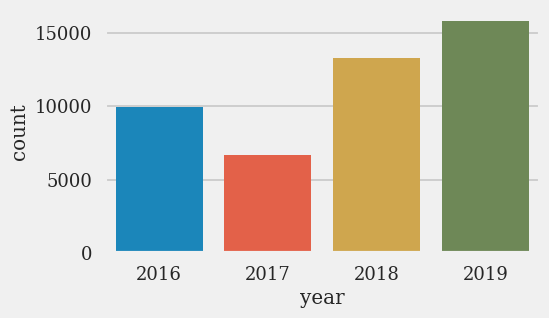

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.countplot(x=train_data['year'], data=train_data)

In [ ]:
year_group = train_data.groupby(['year'])


In [34]:
year_group.get_group('2016')['month'].unique()

array(['06', '05', '03', '07', '11', '04', '10', '02', '09', '12', '01',
       '08'], dtype=object)

<Axes: xlabel='month', ylabel='count'>

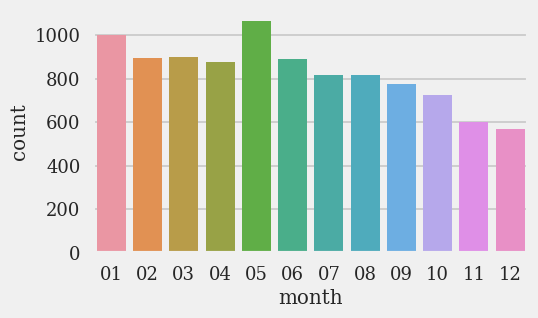

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
sns.countplot(x=year_group.get_group('2016')['month'], data=year_group.get_group('2016'),
              order=sorted(year_group.get_group('2016')['month'].unique()))

columns: Index(['Unnamed: 0', 'ID', 'text', 'target', 'url', 'date', 'year', 'month'], dtype='object')
targets: [3 2 0 5 4 6 1]
each year data numbers: 
year
2019    1709
2018    1643
2016     964
2017     623
Name: count, dtype: int64
each year data numbers: 
month
03    460
11    452
01    441
05    438
04    428
10    420
02    397
12    395
07    390
06    384
09    371
08    363
Name: count, dtype: int64


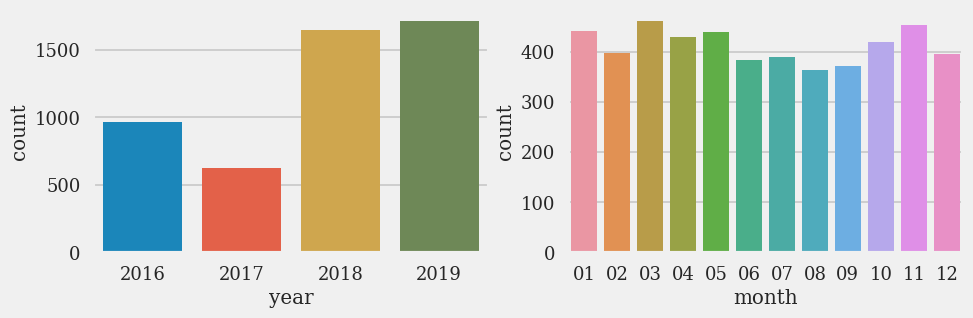

In [63]:
## 사회, it과학 데이터 추가를 위한 월 연도 분포 확인
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num2target = ['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치']
num2target_dict = {idx:item for idx, item in enumerate(num2target)}
target2num = {item:idx for idx, item in enumerate(num2target)}

train_data = pd.read_csv("../data/train_spelling_v2_label_v1.csv")

train_data['year'], train_data['month'] = zip(*train_data['date'].apply(lambda x:extract_year_month(x)))

# 사회 카테고리는 연도 분포/ 월 분포가 어떻게?
print(f"columns: {train_data.columns}")
print(f"targets: {train_data['target'].unique()}")
society_group = train_data.groupby(['target']).get_group(2)

fig, ax = plt.subplots(1,2,figsize=(10,3))
sns.countplot(x=society_group['year'], data=society_group, ax=ax[0],
              order=sorted(society_group['year'].unique().tolist()))
print(f"each year data numbers: \n{society_group['year'].value_counts()}")

sns.countplot(x=society_group['month'], data=society_group, ax=ax[1],
              order=sorted(society_group['month'].unique().tolist()))
print(f"each year data numbers: \n{society_group['month'].value_counts()}")

In [29]:
# 16, 17, 20, 21 년도 사회 데이터를 추가해야겠다.

# 우선 20 년도 사회 데이터를 추가해보자.
bigkinds_2019_2022 = pd.read_csv("../data/bigkinds_2019_2022/bigkinds_total_1922.csv")

In [43]:
def extract_year_month_v2(x):
    pattern = r'(\d{4})(\d{2})'
    if pd.isnull(x):  # Check if x is missing or NaN
        return None, None
    
    match = re.search(pattern, str(x))
    if match:
        year = match.group(1)
        month = match.group(2)
        return year, month
    else:
        return None, None

_, bigkinds_2019_2022['month'] = zip(*bigkinds_2019_2022['date'].apply(lambda x:extract_year_month_v2(x)))

In [60]:
from sklearn.model_selection import train_test_split

# 1000 개의 2020 데이터 추가
bigkinds_society = bigkinds_2019_2022.groupby(['target']).get_group(2)
bigkinds_society_20 = bigkinds_society[bigkinds_society['year']==2020].copy()

print(f"org size:{len(bigkinds_society_20)}, want about 1000 samples.")
bigkinds_society_20 = bigkinds_society_20.dropna(subset=['month'])
print(f"dropped: {len(bigkinds_society_20)}")
_, bigkinds_society_20_sample1300 = train_test_split(bigkinds_society_20, random_state=42, 
                                                     test_size=1300, stratify=bigkinds_society_20['month'])

bigkinds_society_20_sample1300

org size:282743, want about 1000 samples.
dropped: 282743


,date,언론사,text,url,label_text,target,year,month
1822819,20200115,서울신문,경부고속도 신갈분기점서 버스 5중 추돌 1명 사망,NaN,사회,2,2020,01
3360539,20201124,국민일보,공주 한 요양병원서 13명 신규 확진 이 병원서만 15명,NaN,사회,2,2020,11
3114239,20200929,서울경제,"[단독]檢, 옵티머스 수사 정 재계 로비로 확대되나 특수부 대거 투입",NaN,사회,2,2020,09
2237760,20200407,중부매일,"서산시, 전입 시민 안내책자 '왔어유? 서산' 제작",NaN,사회,2,2020,04
2516616,20200531,중부일보,[중부포토] 가천대 학생 2명 코로나 확진 학생 등 200여명 검사,NaN,사회,2,2020,05
...,...,...,...,...,...,...,...,...
3519404,20201227,중부매일,"충북도립대, 국가직 지역인재 9급 재학생 합격",NaN,사회,2,2020,12
2440725,20200515,YTN,"""나 형사과장이야"" 경찰 행세해 2억여 원 가로챈 60대 구속",NaN,사회,2,2020,05
2168617,20200325,세계일보,"손석희 사장, 오늘(25일) 김웅 재판 증인 출석.. 증인신문 비공개 요청",NaN,사회,2,2020,03
1959163,20200213,머니투데이,"경의선 숲길 고양이 학대 40대 남성, 항소심도 실형",NaN,사회,2,2020,02


In [61]:
# 이 데이터들을 전처리 해야함 -> 희진 알고리즘 도입
df = bigkinds_society_20_sample1300

# []안에 있는 친구들 제거
df['text']=df['text'].apply(lambda x: re.sub('\[[^]]*\]', '', x))

# 특수문자 제거
df['text']=df['text'].apply(lambda x: re.sub('[,`‘’“”()/\"\'<>\[\]]','',x))

bigkinds_society_20_sample1000[20:30]

,date,언론사,text,url,label_text,target,year,month
3002696,20200908,대전일보,태안군 8일부터 독감 예방접종 시작,NaN,사회,2,2020,09
3070205,20200922,SBS,현대차 노사 11년 만에 임금 동결 2년 연속 무분규 합의,NaN,사회,2,2020,09
3043334,20200915,대전일보,추석 명절 다가오는데 코로나19로 온정의 손길 뚝,NaN,사회,2,2020,09
2289086,20200415,매일신문,대구시교육청 市와 학원 교습소 특별방역 점검,NaN,사회,2,2020,04
3315078,20201112,부산일보,학생만 억울 산재 적용 못 받는 대학 실험실,NaN,사회,2,2020,11
3211328,20201023,OBS,저용량 아스피린 코로나19 증상 악화 사망 위험↓,NaN,사회,2,2020,10
2260877,20200410,머니투데이,대구 코로나19 신규 환자 0명 첫 환자 발생 후 52일만,NaN,사회,2,2020,04
1947369,20200211,서울신문,봄맞이 단장하는 따오기,NaN,사회,2,2020,02
2946065,20200826,경남도민일보,직원 시켜 산약초 훔친 함양군청 간부 2심도 집유,NaN,사회,2,2020,08
3533218,20201229,KBS,대구교육청 연말연시 공직기강 점검,NaN,사회,2,2020,12


each year data numbers: 
year
2019    1709
2018    1643
2020    1300
2016     964
2017     623
Name: count, dtype: int64
each year data numbers: 
month
03    577
11    559
05    553
01    534
04    533
10    523
02    506
07    501
12    499
06    496
08    481
09    477
Name: count, dtype: int64


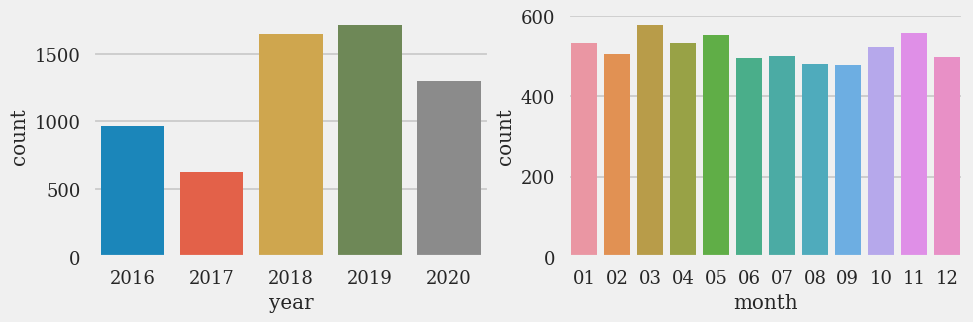

In [64]:
# 기존 train 에 붙이기

train_data_added_society2020 = pd.concat([train_data, bigkinds_society_20_sample1300])
train_data_added_society2020['year'] = train_data_added_society2020['year'].apply(lambda x:str(x))
train_data_added_society2020['month'] = train_data_added_society2020['month'].apply(lambda x:str(x))

# 시각화
society_group = train_data_added_society2020.groupby(['target']).get_group(2)


fig, ax = plt.subplots(1,2,figsize=(10,3))
sns.countplot(x=society_group['year'], data=society_group, ax=ax[0],
              order=sorted(society_group['year'].unique().tolist()))
print(f"each year data numbers: \n{society_group['year'].value_counts()}")

sns.countplot(x=society_group['month'], data=society_group, ax=ax[1],
              order=sorted(society_group['month'].unique().tolist()))
print(f"each year data numbers: \n{society_group['month'].value_counts()}")

In [108]:
bigkinds_society_20_sample1300.head(5)

,date,언론사,text,url,label_text,target,year,month
1822819,20200115,서울신문,경부고속도 신갈분기점서 버스 5중 추돌 1명 사망,NaN,사회,2,2020,01
3360539,20201124,국민일보,공주 한 요양병원서 13명 신규 확진 이 병원서만 15명,NaN,사회,2,2020,11
3114239,20200929,서울경제,檢 옵티머스 수사 정 재계 로비로 확대되나 특수부 대거 투입,NaN,사회,2,2020,09
2237760,20200407,중부매일,서산시 전입 시민 안내책자 왔어유? 서산 제작,NaN,사회,2,2020,04
2516616,20200531,중부일보,가천대 학생 2명 코로나 확진 학생 등 200여명 검사,NaN,사회,2,2020,05


In [107]:
bigkinds_society_20_sample1300.to_csv("../data/train_add_society2020.csv", index=False)

In [65]:
train_data_added_society2020.to_csv("../data/train_spelling_v2_label_v1_add_society2020.csv", index=False)

In [ ]:
# 학습시켜보기


### 5-1-1. "사회" 더하기 전에, LM으로 돌려서 1500개만 뽑자.
사회말고, 각 라벨 500개씩 더 더해보자.

In [173]:
target2num

{'IT과학': 0, '경제': 1, '사회': 2, '생활문화': 3, '세계': 4, '스포츠': 5, '정치': 6}

In [174]:
target2num['IT과학']

0

In [175]:
bigkinds_2019_2022['target'] = bigkinds_2019_2022['label_text'].apply(lambda x:target2num[x])

In [178]:
# 사회 3000개 뽑고, LM 돌려서 2000개만 뽑자. - 2020 데이터로!
# 다른 라벨은 1500개 뽑고, 500개씩만 뽑자.

# 2000 개의 사회 2020 데이터 추가
bigkinds_society = bigkinds_2019_2022.groupby(['target']).get_group(2)
bigkinds_society_20 = bigkinds_society[bigkinds_society['year']==2020].reset_index().copy()

print(f"org size:{len(bigkinds_society_20)}, want about 2000 samples.")
bigkinds_society_20 = bigkinds_society_20.dropna(subset=['month'])
print(f"dropped: {len(bigkinds_society_20)}")
_, bigkinds_society_20_sample2000 = train_test_split(bigkinds_society_20, random_state=42, 
                                                     test_size=3000, stratify=bigkinds_society_20['month'])

# 나머지는 1000개씩 뽑자.
bigkinds_candidate_others = []
for i in range(7):
    if i == 2: 
        bigkinds_candidate_others.append(pd.DataFrame())
        continue
    _cand = bigkinds_2019_2022.groupby(['target']).get_group(i)
    cand = _cand[_cand['year']==2020].reset_index().copy()
    cand = cand.dropna(subset=['month'])
    
    _, sample_1000 = train_test_split(cand, random_state=42,
                                      test_size=1500, stratify=cand['month'])
    bigkinds_candidate_others.append(sample_1000)
    #print(len(sample_1000))
    
bigkinds_candidate_others[2] = bigkinds_society_20_sample2000

for i in range(7):
    print(f"label: {i}, data length: {len(bigkinds_candidate_others[i])}")

    # []안에 있는 친구들 제거
    bigkinds_candidate_others[i]['text']=bigkinds_candidate_others[i]['text'].apply(lambda x: re.sub('\[[^]]*\]', '', x))

    # 특수문자 제거
    bigkinds_candidate_others[i]['text']=bigkinds_candidate_others[i]['text'].apply(lambda x: re.sub('[,`‘’“”()/\"\'<>\[\]]','',x))

org size:282743, want about 2000 samples.
dropped: 282743
label: 0, data length: 1500
label: 1, data length: 1500
label: 2, data length: 3000
label: 3, data length: 1500
label: 4, data length: 1500
label: 5, data length: 1500
label: 6, data length: 1500


In [179]:
# LM들이 예측하는 라벨 리턴하기
from tqdm import tqdm

def inference(model1, model2, model3, model4, data, tokenizer1, tokenizer2, tokenizer3, tokenizer4, DEVICE):
    i = 0
    model1.eval()
    model2.eval()
    model3.eval()
    model4.eval()
    preds = []
    
    for idx, sample in tqdm(data.iterrows(), desc='LM이 라벨링중입니다'):
        inputs1 = tokenizer1(sample['text'], return_tensors="pt").to(DEVICE)
        inputs2 = tokenizer2(sample['text'], return_tensors="pt").to(DEVICE)
        inputs3 = tokenizer1(sample['text'], return_tensors="pt").to(DEVICE)
        inputs4 = tokenizer2(sample['text'], return_tensors="pt").to(DEVICE)
        
        with torch.no_grad():
            logits1 = model1(**inputs1).logits
            logits2 = model2(**inputs2).logits
            logits3 = model3(**inputs3).logits
            logits4 = model4(**inputs4).logits
            logits = logits1 + logits2 + logits3 + logits4
            pred = torch.argmax(torch.nn.Softmax(dim=1)(logits), dim=1).cpu().numpy()
            preds.extend(pred)

        if not i % 500:
            print(i, ' / ', len(data))
        i += 1
    return preds

In [180]:
num2target

['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치']

In [181]:
# LM 으로 재 라벨링

for i in range(7):
    print(f"label {i} is relabelled ...")
    
    pred = inference(LM1, LM2, LM3, LM4, bigkinds_candidate_others[i], tokenizer1, tokenizer2, tokenizer3, tokenizer4, DEVICE)

    bigkinds_candidate_others[i]['pred'] = pred
    
    df = bigkinds_candidate_others[i]
    print(f"label {i} --- \n{df[df['pred'] != df['target']]['pred'].value_counts()}\n \
        ---- aug data: {df[df['pred'] == df['target']]['pred'].value_counts()}\n\n")
    
    # 임시 저장
    df.to_csv("../data/bigkinds_2019_2022/cleaned_2020_all_news_labeladdLM_v1_" +str(num2target[i]) + "_.csv", index=False)

label 0 is relabelled ...


LM이 라벨링중입니다: 1it [00:00,  7.99it/s]

0  /  1500


LM이 라벨링중입니다: 501it [00:54, 10.18it/s]

500  /  1500


LM이 라벨링중입니다: 1002it [01:47,  8.60it/s]

1000  /  1500


LM이 라벨링중입니다: 1500it [02:41,  9.29it/s]


label 0 --- 
pred
2    529
1    261
3    116
4     34
6     15
5     10
Name: count, dtype: int64
         ---- aug data: pred
0    535
Name: count, dtype: int64


label 1 is relabelled ...


LM이 라벨링중입니다: 1it [00:00,  8.71it/s]

0  /  1500


LM이 라벨링중입니다: 502it [00:53,  9.31it/s]

500  /  1500


LM이 라벨링중입니다: 1002it [01:46,  9.16it/s]

1000  /  1500


LM이 라벨링중입니다: 1500it [02:38,  9.47it/s]


label 1 --- 
pred
2    414
3    101
0     60
4     32
6     29
5      3
Name: count, dtype: int64
         ---- aug data: pred
1    861
Name: count, dtype: int64


label 2 is relabelled ...


LM이 라벨링중입니다: 1it [00:00,  9.17it/s]

0  /  3000


LM이 라벨링중입니다: 503it [00:52, 11.57it/s]

500  /  3000


LM이 라벨링중입니다: 1002it [01:47,  8.98it/s]

1000  /  3000


LM이 라벨링중입니다: 1502it [02:41,  8.61it/s]

1500  /  3000


LM이 라벨링중입니다: 2002it [03:34,  9.07it/s]

2000  /  3000


LM이 라벨링중입니다: 2502it [04:29,  9.54it/s]

2500  /  3000


LM이 라벨링중입니다: 3000it [05:22,  9.31it/s]


label 2 --- 
pred
3    293
6    113
1     46
0     26
4     21
5     13
Name: count, dtype: int64
         ---- aug data: pred
2    2488
Name: count, dtype: int64


label 3 is relabelled ...


LM이 라벨링중입니다: 1it [00:00,  9.44it/s]

0  /  1500


LM이 라벨링중입니다: 502it [00:53,  8.82it/s]

500  /  1500


LM이 라벨링중입니다: 1002it [01:48,  9.43it/s]

1000  /  1500


LM이 라벨링중입니다: 1500it [02:42,  9.23it/s]


label 3 --- 
pred
2    409
5     55
4     29
0     22
6     21
1     18
Name: count, dtype: int64
         ---- aug data: pred
3    946
Name: count, dtype: int64


label 4 is relabelled ...


LM이 라벨링중입니다: 0it [00:00, ?it/s]

0  /  1500


LM이 라벨링중입니다: 502it [00:54,  9.04it/s]

500  /  1500


LM이 라벨링중입니다: 1001it [01:47, 10.34it/s]

1000  /  1500


LM이 라벨링중입니다: 1500it [02:40,  9.37it/s]


label 4 --- 
pred
2    348
1     92
6     90
3     50
0     24
5     15
Name: count, dtype: int64
         ---- aug data: pred
4    881
Name: count, dtype: int64


label 5 is relabelled ...


LM이 라벨링중입니다: 0it [00:00, ?it/s]

0  /  1500


LM이 라벨링중입니다: 502it [00:55,  9.08it/s]

500  /  1500


LM이 라벨링중입니다: 1002it [01:51,  7.30it/s]

1000  /  1500


LM이 라벨링중입니다: 1500it [02:45,  9.07it/s]


label 5 --- 
pred
2    102
3     88
4     16
1     11
0     10
6      7
Name: count, dtype: int64
         ---- aug data: pred
5    1266
Name: count, dtype: int64


label 6 is relabelled ...


LM이 라벨링중입니다: 2it [00:00, 11.05it/s]

0  /  1500


LM이 라벨링중입니다: 502it [00:50, 10.84it/s]

500  /  1500


LM이 라벨링중입니다: 1003it [01:34, 12.05it/s]

1000  /  1500


LM이 라벨링중입니다: 1500it [02:17, 10.94it/s]

label 6 --- 
pred
2    324
4     34
1     24
3     14
5      5
0      1
Name: count, dtype: int64
         ---- aug data: pred
6    1098
Name: count, dtype: int64




In [200]:
bigkinds_candidate_others[2] = bigkinds_candidate_others[2].groupby(['target']).get_group(2)
bigkinds_candidate_others[2].sample(n=1300, random_state=42)

,index,date,언론사,text,url,label_text,target,year,month
1241,2364307,20200429,대구일보,휴게소 투명 아크릴 칸막이로 감염 예방,NaN,사회,2,2020,4
1590,2549952,20200608,디지털타임스,수도권 깜깜이 환자 증가세에도 일단 사회적 거리두기 복귀는 더 지켜봐야,NaN,사회,2,2020,6
2513,2856815,20200808,YTN,전남 곡성 산사태 3명 사망...추가 매몰자 구조중,NaN,사회,2,2020,8
2367,2371110,20200430,국민일보,신원확인 안돼 DNA검사 해야 한대요 슬픔 속 이천 화재 유가족,NaN,사회,2,2020,4
2003,2042999,20200227,국민일보,신천지 폐렴 vs 문재인 폐렴,NaN,사회,2,2020,2
...,...,...,...,...,...,...,...,...,...
2916,2714668,20200709,한겨레,장관 지휘권 관철 검찰 민주적 통제 전례 남겼다,NaN,사회,2,2020,7
937,2953713,20200827,부산일보,파업 vs 휴업,NaN,사회,2,2020,8
2808,2725371,20200712,중부일보,소상공인연합회 하루빨리 전열정비할 때다,NaN,사회,2,2020,7
61,2287053,20200414,중앙일보,마스크 안쓰면 얼차려 인도 대책에 韓도 하자 댓글도,NaN,사회,2,2020,4


In [202]:
# 이중에 800개, 1500개 선택,
bigkinds_candidate_others = [pd.DataFrame()] * 7
for i in range(7):
    bigkinds_candidate_others[i] = pd.read_csv("../data/bigkinds_2019_2022/cleaned_2020_all_news_labeladdLM_v1_" +str(num2target[i]) + "_.csv")
    print(f"label {i} is relabelled ...")
    
    print(f"before: {len(bigkinds_candidate_others[i]['target'])}")
    
    try:
        bigkinds_candidate_others[i]['target'] = bigkinds_candidate_others[i]['pred']
        bigkinds_candidate_others[i] = bigkinds_candidate_others[i].drop(['pred'], axis=1)
        
        bigkinds_candidate_others[i] = bigkinds_candidate_others[i].groupby(['target']).get_group(i)
        if i == 2:
            bigkinds_candidate_others[i] = bigkinds_candidate_others[i].sample(n=1300, random_state=42)
        else:
            bigkinds_candidate_others[i] = bigkinds_candidate_others[i].sample(n=700, random_state=42)
        
    except:
        print("already dropped")
        
    print(f"after: {len(bigkinds_candidate_others[i]['target'])}\n")

label 0 is relabelled ...
before: 1500
already dropped
after: 535

label 1 is relabelled ...
before: 1500
after: 700

label 2 is relabelled ...
before: 3000
after: 1300

label 3 is relabelled ...
before: 1500
after: 700

label 4 is relabelled ...
before: 1500
after: 700

label 5 is relabelled ...
before: 1500
after: 700

label 6 is relabelled ...
before: 1500
after: 700



In [204]:
# 이것들 다 합치기

bigkinds_candidate_others_total = pd.DataFrame()
for i in range(7):
    bigkinds_candidate_others_total = pd.concat([bigkinds_candidate_others_total, bigkinds_candidate_others[i]])
print(len(bigkinds_candidate_others_total))
print(535+700*5+1300)

5335
5335


In [205]:
bigkinds_candidate_others_total.to_csv("../data/cleaned_2020_all_news_labeladdLM_v2_JH.csv", index=False)

### 5-1-2. valid 에서 못 맞춘 데이터 BT 로 증강한걸로 합쳐서 학습

In [212]:
bt_1 = pd.read_csv("../data/BT/en2ko_0_7830.csv")
bt_2 = pd.read_csv("../data/BT/en2ko_9136_18271.csv")
bt_3 = pd.read_csv("../data/BT/en2ko_18272_27408 (1).csv")
bt_data = pd.concat([bt_1, bt_2, bt_3])
print(len(bt_data))

26102


In [213]:
bt_data.head(4)

,Unnamed: 0,ID,text,target,url,date,ko2en,en2ko
0,0,ynat-v1_train_00000,유튜브 내달 2일까지 크리에이터 지원 공간 운영,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.06.30. 오전 10:36,YouTube operates a creator support space until...,유튜브 내달 2일까지 크리에이터 지원 공간 운영
1,1,ynat-v1_train_00001,어버이날 맑다가 흐려져…남부지방 옅은 황사,3,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.05.08. 오전 5:25,It's clear and cloudy on Parents' Day...Light ...,어버이날은 맑고 흐립니다...남쪽의 옅은 황사
2,2,ynat-v1_train_00002,내년부터 국가RD 평가 때 논문건수는 반영 않는다,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.03.15. 오후 12:00,The number of papers will not be reflected in ...,논문 수는 내년부터 국가 RD 평가에 반영되지 않을 것입니다
3,3,ynat-v1_train_00003,김명자 신임 과총 회장 원로와 젊은 과학자 지혜 모을 것,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.02.28. 오전 9:54,"Kim Myung-ja, the new chairman of the Korea Fe...","김명자 신임 한국과학기술총연합회 회장, 젊은 과학자들 지혜 모아"


In [222]:
# valid에 해당하는 id가 en2ko 되어있는지 확인하자.

val_JH = pd.read_csv("../results/01163218-train_spelling_v2_label_v1-cleaned_2020_all_news_labeladdLM_v2_JH/01163218-train_spelling_v2_label_v1-cleaned_2020_all_news_labeladdLM_v2_JH_val.csv")

true_y = val_JH['target']
predicted_y = val_JH['pred_y']

val_JH_society = val_JH.groupby(['target']).get_group(2)
# print(f"\t<정답은 사회이지만 경제로 예측한 데이터 예시 - 주형 모든뉴스(2020) 추가>\n")
# print(val_JH_society[val_JH_society['pred_y'] == 1]['text'][10:30])


wrong_in_valid_JH = val_JH[val_JH['target'] != val_JH['pred_y']]
wrong_in_valid_JH_en2ko = bt_data[bt_data['ID'].isin(wrong_in_valid_JH['ID'])]


In [223]:
print(f"역번역됬는데, valid에 해당하고, 못 맞춘 것 길이: {len(wrong_in_valid_JH_en2ko)}")

역번역됬는데, valid에 해당하고, 못 맞춘 것 길이: 908


In [229]:
wrong_in_valid_JH_en2ko.to_csv("../data/cleaned_2020_all_news_labeladdLM_v2_JH_wrong_in_valid.csv")

In [225]:
wrong_in_valid_JH_en2ko['text'] = wrong_in_valid_JH_en2ko['en2ko']


In [228]:
# bigkinds_society_20 = bigkinds_society_20.dropna(subset=['month'])
wrong_in_valid_JH_en2ko = wrong_in_valid_JH_en2ko.dropna(subset=['text'])

In [232]:
wrong_in_valid_JH_en2ko.isna().sum()

Unnamed: 0    0
ID            0
text          0
target        0
url           0
date          0
ko2en         0
en2ko         0
dtype: int64

In [226]:
wrong_in_valid_JH_en2ko.head(5)

,Unnamed: 0,ID,text,target,url,date,ko2en,en2ko
55,55,ynat-v1_train_00055,당국의 느린 검토가 GSMA 통신 합병 및 합병 중 비즈니스를 방해합니다,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.02.14. 오전 11:07,Slow review by authorities hinders business du...,당국의 느린 검토가 GSMA 통신 합병 및 합병 중 비즈니스를 방해합니다
89,89,ynat-v1_train_00089,은행 점포 폐쇄 시 고객 영향 평가...불편 최소화 방안 유도,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.08.01. 오전 6:20,Customer impact assessment when bank stores ar...,은행 점포 폐쇄 시 고객 영향 평가...불편 최소화 방안 유도
120,120,ynat-v1_train_00120,롯데카드 MLB 팀 이미지가 담긴 한정판 카드 출시,1,https://sports.news.naver.com/news.nhn?oid=001...,2019.10.14 11:29,Lotte Card Launches Limited Edition Card with ...,롯데카드 MLB 팀 이미지가 담긴 한정판 카드 출시
166,166,ynat-v1_train_00166,"새해 회담과 회의, 미국의 전략자산이 추가로 개발될 시기는",6,https://news.naver.com/main/read.nhn?mode=LS2D...,2016.01.13. 오전 11:25,"New Year's talks and conferences, the time for...","새해 회담과 회의, 미국의 전략자산이 추가로 개발될 시기는"
186,186,ynat-v1_train_00186,"영장실질심사 출석한 임종헌, 침묵",6,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.10.26. 오전 10:19,"Im Jong-heon, who attends the warrant review, ...","영장실질심사 출석한 임종헌, 침묵"


In [220]:
wrong_in_valid_JH.head(3)

,Unnamed: 0,ID,text,target,url,date,track,pred_y
0,14823,ynat-v1_train_14823,인도 프리미엄폰 시장 잡아라…삼성·애플·샤오미 한판,0,https://news.naver.com/main/read.nhn?mode=LS2D...,2017.10.12. 오전 7:15,train_spelling_v2_label_v1,4
22,16298,ynat-v1_train_16298,네이마르바르사 소송전에도…MSN 트리오는 화기애애,5,https://sports.news.naver.com/news.nhn?oid=001...,2017.08.23 08:48,train_spelling_v2_label_v1,4
33,34398,ynat-v1_train_34398,고침문화수어영상 크기·위치 맘대로…,2,https://news.naver.com/main/read.nhn?mode=LS2D...,2018.02.21. 오후 2:43,train_spelling_v2_label_v1,3


In [219]:
print(len(wrong_in_valid_JH), len(val_JH))

1338 13704


### 5-2. IT과학 더하기 -> 일단 냅두자.

columns: Index(['Unnamed: 0', 'ID', 'text', 'target', 'url', 'date', 'year', 'month'], dtype='object')
targets: [3 2 0 5 4 6 1]
each year data numbers: 
year
2017    1936
2018    1287
2019    1219
2016    1096
Name: count, dtype: int64
each year data numbers: 
month
02    549
03    544
04    540
05    516
08    467
07    448
09    444
11    441
06    435
10    412
01    377
12    365
Name: count, dtype: int64


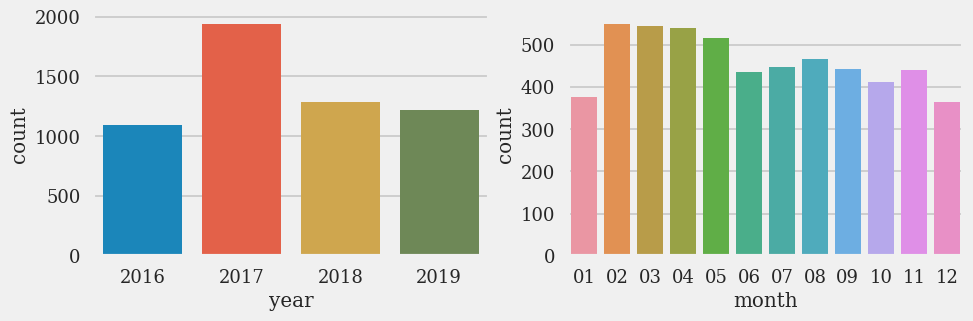

In [66]:
## 사회, it과학 데이터 추가를 위한 월 연도 분포 확인
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num2target = ['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치']
num2target_dict = {idx:item for idx, item in enumerate(num2target)}
target2num = {item:idx for idx, item in enumerate(num2target)}

# train_data = pd.read_csv("../data/train_spelling_v2_label_v1.csv")

# train_data['year'], train_data['month'] = zip(*train_data['date'].apply(lambda x:extract_year_month(x)))

# IT 카테고리는 연도 분포/ 월 분포가 어떻게?
print(f"columns: {train_data.columns}")
print(f"targets: {train_data['target'].unique()}")
ITscience_group = train_data.groupby(['target']).get_group(0)

fig, ax = plt.subplots(1,2,figsize=(10,3))
sns.countplot(x=ITscience_group['year'], data=ITscience_group, ax=ax[0],
              order=sorted(ITscience_group['year'].unique().tolist()))
print(f"each year data numbers: \n{ITscience_group['year'].value_counts()}")

sns.countplot(x=ITscience_group['month'], data=ITscience_group, ax=ax[1],
              order=sorted(ITscience_group['month'].unique().tolist()))
print(f"each year data numbers: \n{ITscience_group['month'].value_counts()}")

## 6. Confusion matrix 그려보기

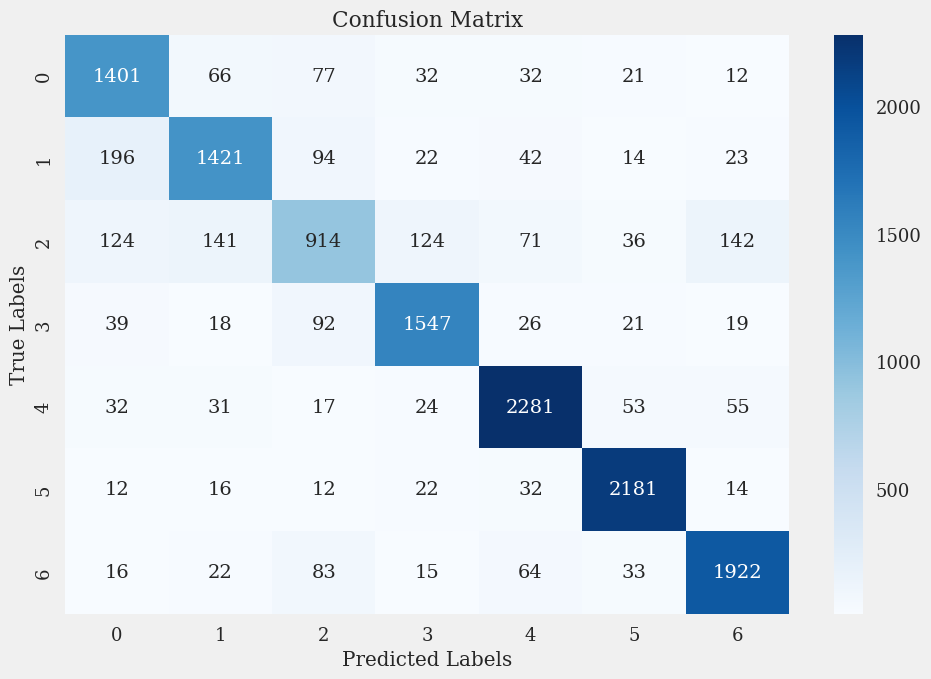

In [84]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

valid_data_org = pd.read_csv("../results/29163305-train/29163305-train_val.csv")
valid_data_add_society_2020 = pd.read_csv("../results/01101956-train_spelling_v2_label_v1_add_society2020/01101956-train_spelling_v2_label_v1_add_society2020_val.csv")

true_y = valid_data_org['target']
predicted_y = valid_data_org['pred_y']
cm_org = confusion_matrix(y_true=true_y, y_pred=predicted_y)

true_2 = valid_data_add_society_2020['target']
predicted_2 = valid_data_add_society_2020['pred_y']
cm_add_society_2020 = confusion_matrix(y_true=true_2, y_pred=predicted_2)

sns.heatmap(cm_org, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
# plt.xticks(ticks=range(len(classes)), labels=classes, rotation=45)
# plt.yticks(ticks=range(len(classes)), labels=classes, rotation=0)

plt.show()

Text(0.5, 1.0, 'Confusion Matrix')

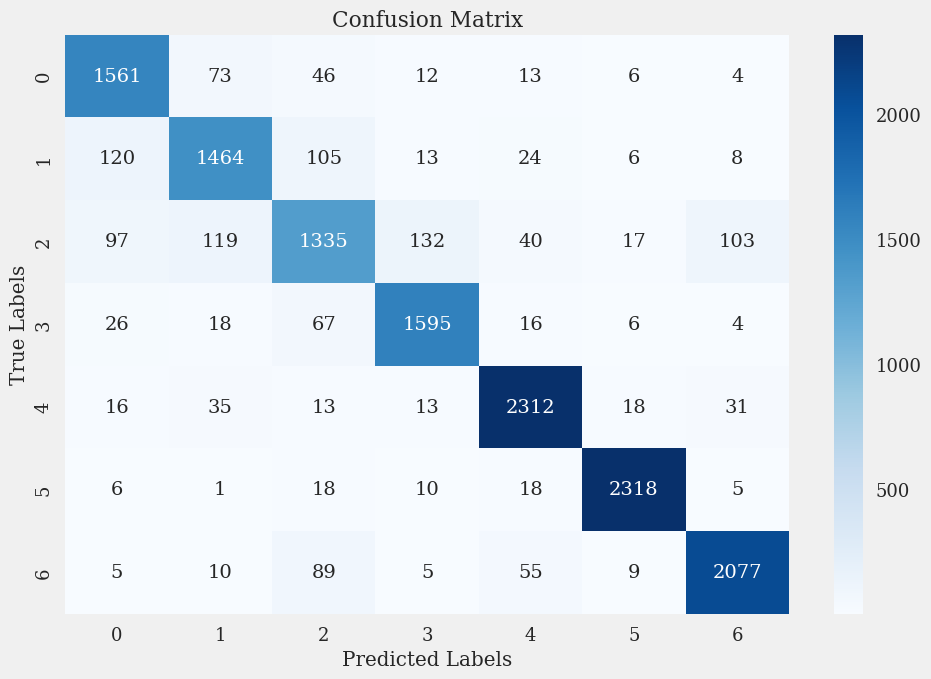

In [85]:
# 잘못 학습한 데이터로 val confusion matrix그리는 것. 추가 외부데이터도 val에 섞여있다.
# 사회를 추가했을 때의 matrix이다.
sns.heatmap(cm_add_society_2020, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

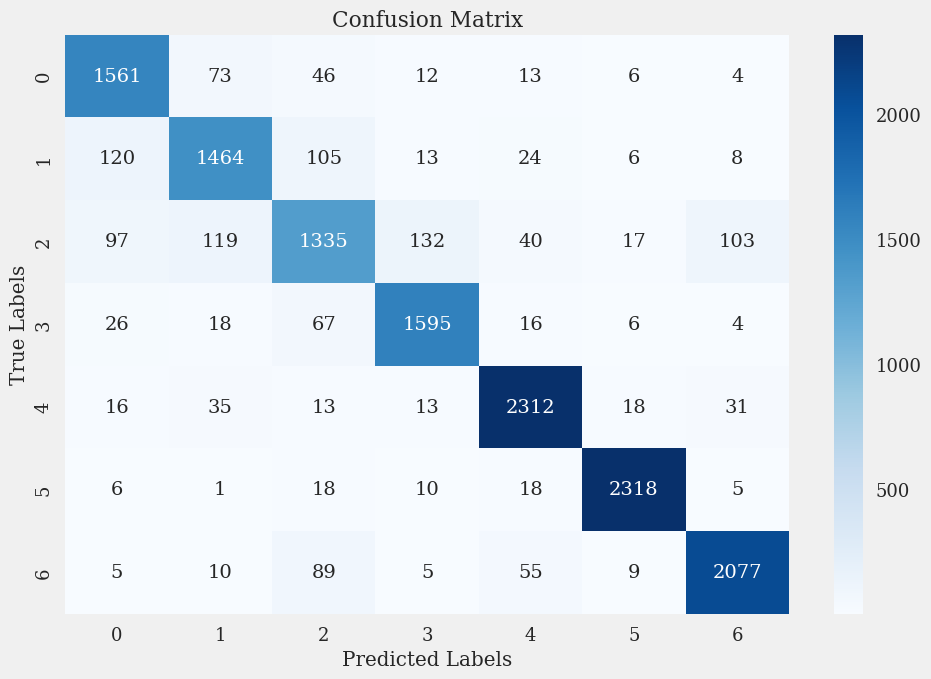

In [123]:
# 사회데이터를 추가하고, 원래 train에서의 30%에 대한 valid는 어떻게 변했는지 확인

valid_data_add_society_2020_2 = pd.read_csv("../results/01101956-train_spelling_v2_label_v1_add_society2020/01101956-train_spelling_v2_label_v1_add_society2020_val.csv")

true_y = valid_data_add_society_2020_2['target']
predicted_y = valid_data_add_society_2020_2['pred_y']
cm = confusion_matrix(y_true=true_y, y_pred=predicted_y)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# 결과분석 -> 오히려 3번(생활문화)로 예측한 것은 늘었다. 이건 LM으로 잡아줘야겠다.

In [93]:
# 사회 데이터를 1300개 추가했었다. 여기서 valid는 얼마나 늘었는가?
print(f"org society len:{len(true_y[true_y == 2])}, add society len: {len(true_2[true_2==2])} \
    -> {len(true_2[true_2==2])-len(true_y[true_y == 2])} 개 ({(len(true_2[true_2==2])-len(true_y[true_y == 2]))/len(true_y[true_y == 2])*100})% 증가")

# 그래서 결과적으로 감소한 society 오답률은?


org society len:1552, add society len: 1843     -> 291 개 (18.75)% 증가


In [109]:
valid_data_society_wronly_predicted = valid_data_org.groupby(['target']).get_group(2)
print(f"\t<정답은 사회이지만 생활문화로 예측한 데이터 예시 - 원본+spelling>\n")
print(valid_data_society_wronly_predicted[valid_data_society_wronly_predicted['pred_y'] == 3]['text'][10:30])

	<정답은 사회이지만 생활문화로 예측한 데이터 예시 - 원본+spelling>

940                     홍천군 찰옥수수축제 28∼30일 열려
1008           미세먼지 비상구는 대중교통…제일기획 광고 공모전 대상
1055          서울로 초기 흥행 순풍…9일 만에 방문자 80만명 육박
1300        우수도서관에 어린이도서관·소화초등학교…25일 전국도서관대회
1348           광주세계수영대회 조직위 문화행사 시민 공연예술가 모집
1603                예스이사 영어학씁써 마흔대가 가장 마니 산다
1872           목포에 마이스 관광객 몰린다…춤추는 바다분수 등 인기
1931                   인사말 하는 김애란 한국분장예술인협회장
2037    울릉 3일간 기록적인 물폭탄 398.1㎜…78년 관측 사상 최고치
2153                    연합이매진 해남땅끝마을 희망의 시작점
2233          차세대 지휘자 찾아…서울시향 부지휘자 최초로 공개 모집
2335              기립박수 받고 떠나는 금호아트홀…끝이 아닌 시작
2357          날씨 흐리고 곳곳 비…낮 23∼29도 늦더위 계속12일
2428               인터파크 인기 유튜버 초청 1인 방송 무료강의
2459                  게시판 출판인 위한 출판경영마케팅 클래스
2482              롯데월드타워서 국제수직마라톤대회 스카이런 열린다
2562            예수릐전당 치닐롤라 느마쾨에 사과…아프로 신경쓰겓따
2645              아침 안개 이후 화창한 봄날씨…사전 투표 하세요
2672           평창대관령음악제 오늘 개막…강원에 펼쳐질 젊은 클래식
2724             박썬히 코리안심포니오케스트라 시님 대표이사 임명식
Name: text, dtype: object


In [110]:
valid_data_society_wronly_predicted_add_society = valid_data_add_society_2020.groupby(['target']).get_group(2)
print(f"\t<정답은 사회이지만 생활문화로 예측한 데이터 예시 - 원본+spelling+사회1300개 더한걸로 valid 나눴을 때>\n")
print(valid_data_society_wronly_predicted_add_society[valid_data_society_wronly_predicted_add_society['pred_y'] == 3]['text'][10:30])

	<정답은 사회이지만 생활문화로 예측한 데이터 예시 - 원본+spelling+사회1300개 더한걸로 valid 나눴을 때>

534                       씨엘 어마어마한 아우라
721        헬조선을 벗어나 세계로…한국 청년들은 왜 떠나는가
734           패션은 다문화의 공감대이자 사회 통합의 촉매
850          주말 추위 대신 미세먼지...내일도 공기 탁해
970      버려진 병원에 예술이 피었다…광주가 상처를 보듬는 법
1081            대학생 눈높이에 맞춰 쓴 중국역사 개설서
1130               차가운 출근길 서울 9일째 건조경보
1147       한국 지난해 세계에서 국제회의 가장 많이 개최했다
1150        경광봉 안 보여요 야심한 밤 위험한 마라톤 대회
1273    4년 논란 승무·태평무·살풀이춤 보유자 9명 인정 예고
1335       오리·달·백조·쥐 이어 이번엔 석촌호수에 끈적괴물
1356          출판인회의 출판인 경험 나누는 출판정담 개최
1602          예스24 영어학습서 40대가 가장 많이 산다
1643      충주 어린이 놀이시설 라바랜드 입장객 30만명 돌파
1809    서울로 초기 흥행 순풍…9일 만에 방문자 80만명 육박
1854                       천연보호구역을 지켜라
1869       어머니를 응원합니다 KBS 아침마당 어버이날 특집
1929      전남 침수·가로수 피해 속출…호우특보 모두 해제종합
2002       행복얼라이언스 청계천 징검다리 도시락 기부 이벤트
2140           오늘 오전까지 비 눈 강원 산지 대설주의보
Name: text, dtype: object


In [206]:
# 추가하는 데이터는 말뭉치로 1차 걸러볼까? - 생활문화에 많이 나오는 단어가 포함되어있으면 해당 데이터를 제거해서 더해볼까?
num2target

['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치']

In [207]:
# 한때 SOTA였던 희진-매일경제 와 비교해볼까...
val_heejin = pd.read_csv("../results/01150855-train_spelling_v2_label_v1-cleaned_1920_매일경제_labeladdLM_v1/01150855-train_spelling_v2_label_v1-cleaned_1920_매일경제_labeladdLM_v1_val.csv")

true_y = valid_data_add_society_2020_2['target']
predicted_y = valid_data_add_society_2020_2['pred_y']

val_heejin_society = val_heejin.groupby(['target']).get_group(2)
print(f"\t<정답은 사회이지만 경제로 예측한 데이터 예시 - 희진 매일경제>\n")
print(val_heejin_society[val_heejin_society['pred_y'] == 1]['text'][10:30])

	<정답은 사회이지만 경제로 예측한 데이터 예시 - 희진 매일경제>

1427         삼성물산 KCC에 주택사업 매각 고려 안 해종합
1440      계약과 다른 요금 청구…유료방송 고객피해 38.6%↑
1570       자사주 매입 자신감 드러낸 조준호…G6 성공할까종합
1715        은산분리·샌드박스·기촉법 등 금융3법 주후반 윤곽
1767         SKTCJ헬로비전 인수합병 둘러싸고 치열한 공방
1768             주요 업종 수출 점검회의 참석하는 백운규
1788             현대차 고성능 N의 첫 모델 벨로스터 N
2065      SKT CJ헬로비전 인수합병 무산 가능성 첫 공식언급
2656               월드클래스 300 기업 선정서 수여식
2718               예금보험 적용 금융사 정보 개방 추진
2785     한진해운 79척 운항차질…주중 10개국에 압류금지 신청
2851           SP 현대·기아차·모비스 등급 BBB로 하향
2959           한은 경제통계 해설강좌 내달 14일까지 접수
2971    금감원 올해 비조치의견서 단 7건 발급…책임문제로 소극적
3289     주택보급률은 107%인데…내집 없는 가구는 40% 육박
3298             4대 금융투자협회장 선거 직접투표 생중계
3335             창업 열기 식었나…부산지역 신설법인 감소
3528         이중고 조선3사…구조조정 압박에 발주사 횡포까지
3569         부실합병·불황 끝에 무너진 우량기업 포스코플랜텍
3610        특징주 아난티 짐 로저스 사외이사 선임에 급등종합
Name: text, dtype: object


In [208]:
# 한때 SOTA였던 희진-매일경제 와 비교해볼까...
val_heejin = pd.read_csv("../results/01163218-train_spelling_v2_label_v1-cleaned_2020_all_news_labeladdLM_v2_JH/01163218-train_spelling_v2_label_v1-cleaned_2020_all_news_labeladdLM_v2_JH_val.csv")

true_y = valid_data_add_society_2020_2['target']
predicted_y = valid_data_add_society_2020_2['pred_y']

val_heejin_society = val_heejin.groupby(['target']).get_group(2)
print(f"\t<정답은 사회이지만 경제로 예측한 데이터 예시 - 주형 모든뉴스(2020) 추가>\n")
print(val_heejin_society[val_heejin_society['pred_y'] == 1]['text'][10:30])

	<정답은 사회이지만 경제로 예측한 데이터 예시 - 주형 모든뉴스(2020) 추가>

1119    아마존 일자리 창출 앞장…직원 1년새 24만명 늘어 54만명
1206         골프·관광 회원제 글로벌 기업 제주 찍고 부산 진출
1216              현대글로비스메쉬코리아 추석선물 배송 MOU
1292          CJ헬로에 딜라이브 인수 추진 보도 조회공시 요구
1427           삼성물산 KCC에 주택사업 매각 고려 안 해종합
1435                  한아세안 전기전자·농림수산 협력해야
1483             저비용항공사들 부산∼괌 노선 쟁탈전 점입가경
1570         자사주 매입 자신감 드러낸 조준호…G6 성공할까종합
1715          은산분리·샌드박스·기촉법 등 금융3법 주후반 윤곽
1767           SKTCJ헬로비전 인수합병 둘러싸고 치열한 공방
1768               주요 업종 수출 점검회의 참석하는 백운규
1788               현대차 고성능 N의 첫 모델 벨로스터 N
2065        SKT CJ헬로비전 인수합병 무산 가능성 첫 공식언급
2379            카카오 임지훈 대표 취임 1주년…초라한 성적표
2436         불황에도 근속연수 길어졌다…대우조선 16.8년 최장
2718                 예금보험 적용 금융사 정보 개방 추진
2746       재활용 플라스틱 가격 올라 플라스틱 줄이기 전쟁에 차질
2851             SP 현대·기아차·모비스 등급 BBB로 하향
2971      금감원 올해 비조치의견서 단 7건 발급…책임문제로 소극적
3016      블랙베리 퀄컴과 특허료 분쟁에서 승리…8억달러 돌려받는다
Name: text, dtype: object


## 7. 희진 데이터에 더 추가해보기

columns: Index(['Unnamed: 0', 'ID', 'text', 'target', 'url', 'date', 'year', 'month'], dtype='object')
targets: [3 2 0 5 4 6 1]
each data numbers: 
target
2    15039
6     6675
3     5314
4     3951
1     1409
5      807
0      719
Name: count, dtype: int64


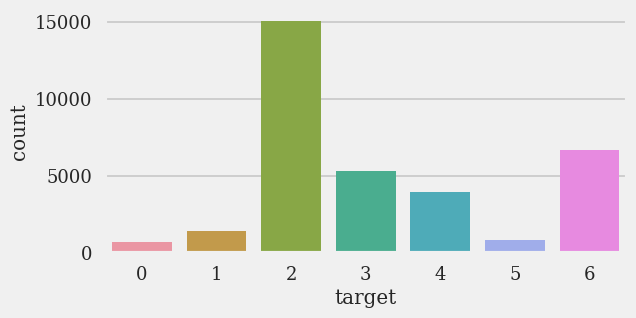

In [117]:
heejin_1st = pd.read_csv("../data/cleaned_1920_YTN_labeladdLM_v1.csv")

## 사회, it과학 데이터 추가를 위한 월 연도 분포 확인
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num2target = ['IT과학', '경제', '사회', '생활문화', '세계', '스포츠', '정치']
num2target_dict = {idx:item for idx, item in enumerate(num2target)}
target2num = {item:idx for idx, item in enumerate(num2target)}

print(f"columns: {train_data.columns}")
print(f"targets: {train_data['target'].unique()}")
ITscience_group = train_data.groupby(['target']).get_group(0)

fig, ax = plt.subplots(1,1,figsize=(6,3))
sns.countplot(x=heejin_1st['target'], data=ITscience_group,
              #order=sorted(ITscience_group['year'].unique().tolist())
              )
print(f"each data numbers: \n{heejin_1st['target'].value_counts()}")

In [ ]:
## 사회 데이터 -> LM이 사회라고 예측한 데이터만 추가해서 학습하자.
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoModel

DEVICE = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

LM1 = AutoModelForSequenceClassification.from_pretrained('jihoonkimharu/bert-base-klue-ynat-finetuned').to(DEVICE)
LM2 = AutoModelForSequenceClassification.from_pretrained('yobi/klue-roberta-base-ynat').to(DEVICE)
LM3 = AutoModelForSequenceClassification.from_pretrained('ehddnr301/bert-base-ehddnr-ynat').to(DEVICE)
LM4 = AutoModelForSequenceClassification.from_pretrained('bash1130/bert-base-finetuned-ynat').to(DEVICE)

tokenizer1 = AutoTokenizer.from_pretrained('jihoonkimharu/bert-base-klue-ynat-finetuned')
tokenizer2 = AutoTokenizer.from_pretrained('yobi/klue-roberta-base-ynat')
tokenizer3 = AutoTokenizer.from_pretrained('ehddnr301/bert-base-ehddnr-ynat')
tokenizer4 = AutoTokenizer.from_pretrained('bash1130/bert-base-finetuned-ynat')

In [150]:
# LM들이 예측하는 라벨 리턴하기
from tqdm import tqdm

def inference(model1, model2, model3, model4, data, tokenizer1, tokenizer2, tokenizer3, tokenizer4, DEVICE):
    model1.eval()
    model2.eval()
    model3.eval()
    model4.eval()
    preds = []
    
    for idx, sample in tqdm(data.iterrows(), desc='LM이 라벨링중입니다'):
        inputs1 = tokenizer1(sample['text'], return_tensors="pt").to(DEVICE)
        inputs2 = tokenizer2(sample['text'], return_tensors="pt").to(DEVICE)
        inputs3 = tokenizer1(sample['text'], return_tensors="pt").to(DEVICE)
        inputs4 = tokenizer2(sample['text'], return_tensors="pt").to(DEVICE)
        
        with torch.no_grad():
            logits1 = model1(**inputs1).logits
            logits2 = model2(**inputs2).logits
            logits3 = model3(**inputs3).logits
            logits4 = model4(**inputs4).logits
            logits = logits1 + logits2 + logits3 + logits4
            pred = torch.argmax(torch.nn.Softmax(dim=1)(logits), dim=1).cpu().numpy()
            preds.extend(pred)

        if not idx % 500:
            print(idx, ' / ', len(data))

    return preds

In [122]:
# 추가하고자 하는 사회 데이터를 라벨링 다시해보자.
df = pd.read_csv("../data/train_add_society2020.csv")
pred = inference(LM1, LM2, LM3, LM4, df, tokenizer1, tokenizer2, tokenizer3, tokenizer4, DEVICE)

df['pred'] = pred

LM이 라벨링중입니다: 3it [00:00,  6.28it/s]

0  /  1300


LM이 라벨링중입니다: 503it [00:31, 16.98it/s]

500  /  1300


LM이 라벨링중입니다: 1003it [01:04, 16.08it/s]

1000  /  1300


LM이 라벨링중입니다: 1300it [01:23, 15.52it/s]


In [126]:
# 얼마나 바로 잡혔나?
df[df['pred'] != df['target']]['pred'].value_counts()
# 생활문화가 엄청 많이 있다.

pred
3    132
6     52
1     24
4     10
0      9
5      3
Name: count, dtype: int64

In [ ]:
# 다시 사회를 라벨링 하자.
df['target'] = df['pred']
df = df.drop(['pred'], axis=1)

In [130]:
df['target'].value_counts()
df.to_csv("../data/train_add_society2020_labeladdLM.csv", index=False)